In [2]:
import pandas as pd
import numpy as np
import pickle, IPython,soundfile, librosa
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
rawDf = pd.read_csv('./results_re_new.csv')
rawDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116761 entries, 0 to 116760
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   116761 non-null  int64  
 1   fileName     116761 non-null  object 
 2   recon_error  116761 non-null  float64
 3   t_v          116761 non-null  object 
 4   lv           116761 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.5+ MB


In [4]:
labels = pd.read_csv('sound_labeling_1s.csv')
labels.columns = ['fileName', 'isInfected']
labels.isInfected.value_counts()

0    6224
1     616
Name: isInfected, dtype: int64

In [5]:
rawDf.fileName.iloc[-1]
labels.fileName.iloc[-1]

'FA0004_GW01_H01_0203_20211109020145_farm_mic_snd_ecf0feec424e_58.jpg'

'FA0004_GW01_H01_0203_20211117081644_farm_mic_snd_50cbcc6d48e7_59.jpg'

In [6]:
rawDf = pd.merge(rawDf,labels,how="left", left_on='fileName', right_on = 'fileName')
rawDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116761 entries, 0 to 116760
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   116761 non-null  int64  
 1   fileName     116761 non-null  object 
 2   recon_error  116761 non-null  float64
 3   t_v          116761 non-null  object 
 4   lv           116761 non-null  object 
 5   isInfected   4366 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.2+ MB


In [7]:
rawDf.isnull().sum()

rawDf.isInfected.fillna(0, inplace=True)

rawDf.isnull().sum()

Unnamed: 0          0
fileName            0
recon_error         0
t_v                 0
lv                  0
isInfected     112395
dtype: int64

Unnamed: 0     0
fileName       0
recon_error    0
t_v            0
lv             0
isInfected     0
dtype: int64

In [8]:
rawDf['createTime'] = [x.split('_')[4] for x in rawDf.fileName]
rawDf['createTime'] = pd.to_datetime(rawDf.createTime)
rawDf

Unnamed: 0                                           fileName  \
0                0  FA0004_GW01_H01_0202_20211108000647_farm_mic_s...   
1                1  FA0004_GW01_H01_0202_20211108000647_farm_mic_s...   
2                2  FA0004_GW01_H01_0202_20211108000647_farm_mic_s...   
3                3  FA0004_GW01_H01_0202_20211108000647_farm_mic_s...   
4                4  FA0004_GW01_H01_0202_20211108000647_farm_mic_s...   
...            ...                                                ...   
116756      116756  FA0004_GW01_H01_0203_20211109020145_farm_mic_s...   
116757      116757  FA0004_GW01_H01_0203_20211109020145_farm_mic_s...   
116758      116758  FA0004_GW01_H01_0203_20211109020145_farm_mic_s...   
116759      116759  FA0004_GW01_H01_0203_20211109020145_farm_mic_s...   
116760      116760  FA0004_GW01_H01_0203_20211109020145_farm_mic_s...   

        recon_error                                                t_v  \
0          8.563087  [[-0.8657598   0.26836744  0.2985441   0.29884...   
1          6.014207  [[-0.8657811   0.26920158  0.2981452   0.29843...   
2          6.562281  [[-0.86576504  0.26856956  0.29844603  0.29874...   
3         17.465483  [[-0.8657417   0.26768392  0.29887283  0.29918...   
4          8.663741  [[-0.8657605   0.26839483  0.29853004  0.29883...   
...             ...                                                ...   
116756     5.744726  [[-0.8657573   0.26827034  0.29859167  0.29889...   
116757     7.035466  [[-0.86575407  0.2681472   0.29864728  0.29895...   
116758     7.286809  [[-0.8657457   0.26783353  0.29879835  0.29911...   
116759     4.676989  [[-0.8657607   0.2684018   0.29852477  0.29883...   
116760    12.558559  [[-0.8657572   0.26826957  0.2985893   0.29889...   

                                                       lv  isInfected  \
0       [0.33124253 0.5732816  0.6453665  0.4024513  0...         0.0   
1       [0.3567784  0.32091618 0.6110509  0.27929252 0...         0.0   
2       [0.45045543 0.5302291  0.76690334 0.46394965 0...         0.0   
3       [0.3483166  0.44729453 0.36704037 0.54469496 0...         0.0   
4       [0.7192423  0.5032843  0.46261373 0.3563897  0...         0.0   
...                                                   ...         ...   
116756  [0.5724994  0.4572545  0.53600144 0.58755577 0...         0.0   
116757  [0.39436376 0.3542347  0.69939816 0.58892083 0...         0.0   
116758  [0.5411599  0.60464764 0.62985474 0.653262   0...         0.0   
116759  [0.5635066  0.4983942  0.55183995 0.3532844  0...         0.0   
116760  [0.45351622 0.48258317 0.48556542 0.29464045 0...         0.0   

                createTime  
0      2021-11-08 00:06:47  
1      2021-11-08 00:06:47  
2      2021-11-08 00:06:47  
3      2021-11-08 00:06:47  
4      2021-11-08 00:06:47  
...                    ...  
116756 2021-11-09 02:01:45  
116757 2021-11-09 02:01:45  
116758 2021-11-09 02:01:45  
116759 2021-11-09 02:01:45  
116760 2021-11-09 02:01:45  

[116761 rows x 7 columns]

## plot by recon_error

<Figure size 1000x700 with 0 Axes>

abnormal : 341


<AxesSubplot: xlabel='recon_error', ylabel='Count'>

Text(0.5, 1.0, 'abnormal')

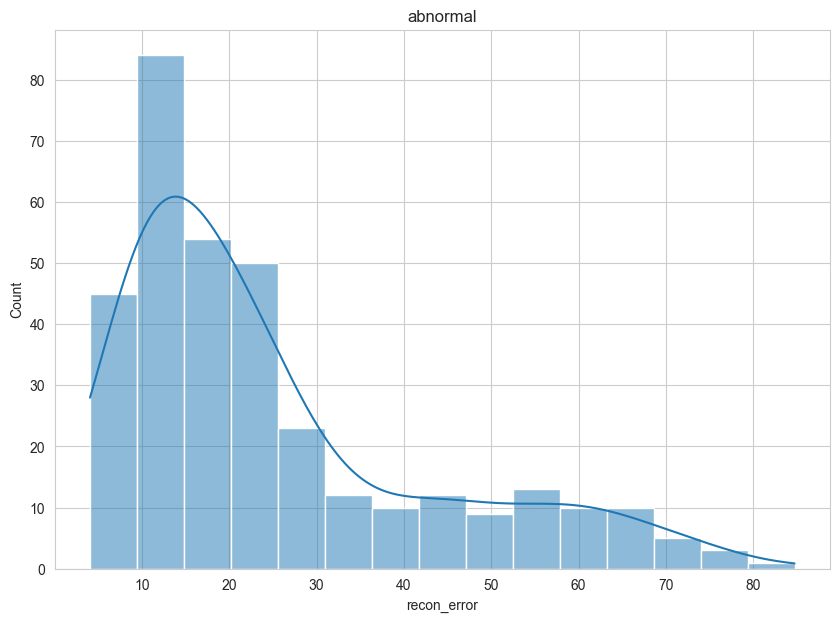

<Figure size 1000x700 with 0 Axes>

normal : 116420


<AxesSubplot: xlabel='recon_error', ylabel='Count'>

Text(0.5, 1.0, 'normal')

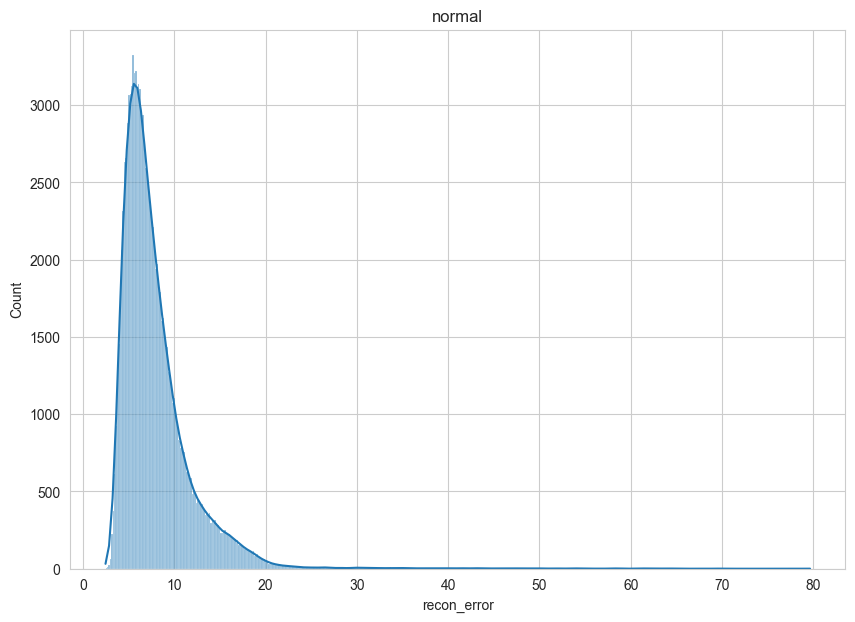

In [62]:

sns.set_style('whitegrid')

plt.figure(figsize=(10,7))
print(f"abnormal : {len(rawDf[rawDf.isInfected == 1.0]['recon_error'])}")
sns.histplot(data=rawDf[rawDf.isInfected == 1.0]['recon_error'], kde=True)
plt.title("abnormal")
plt.show()

plt.figure(figsize=(10,7))
print(f"normal : {len(rawDf[rawDf.isInfected == 0.0]['recon_error'])}")
sns.histplot(data=rawDf[rawDf.isInfected == 0.0]['recon_error'], kde=True)
plt.title("normal")
plt.show()



count :             Unnamed: 0  fileName  recon_error    t_v     lv  createTime
isInfected                                                             
0.0              22879     22879        22879  22879  22879       22879
1.0                232       232          232    232    232         232


<Figure size 1000x700 with 0 Axes>

<AxesSubplot: xlabel='createTime', ylabel='recon_error'>

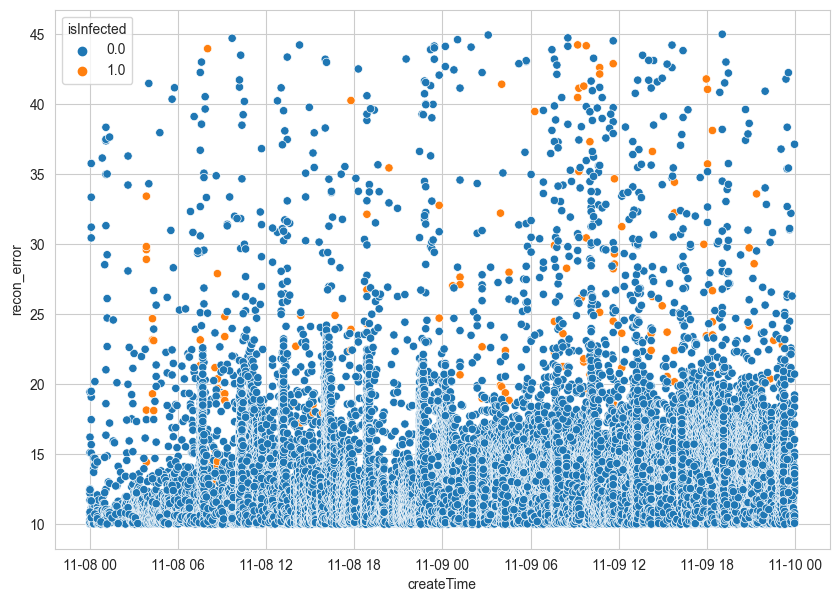

In [18]:
sns.set_style('whitegrid')

plot_df = rawDf[(rawDf.recon_error >= 10) & (rawDf.recon_error< 45)]
print(f"count : {plot_df.groupby('isInfected').agg('count')}")
plt.figure(figsize=(10,7))
sns.scatterplot(data=plot_df, x='createTime', y='recon_error', hue='isInfected')
plt.show()

In [19]:
fileListAllStrage = rawDf[(rawDf.recon_error > 20.)]['fileName'].to_list()
print(f"{len(fileListAllStrage)}/{len(rawDf)}")

1522/116761


### image normal 

9633

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_07.jpg : [10.82011]


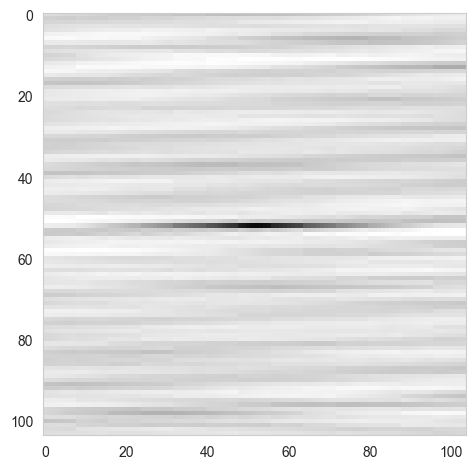

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_17.jpg : [10.911337]


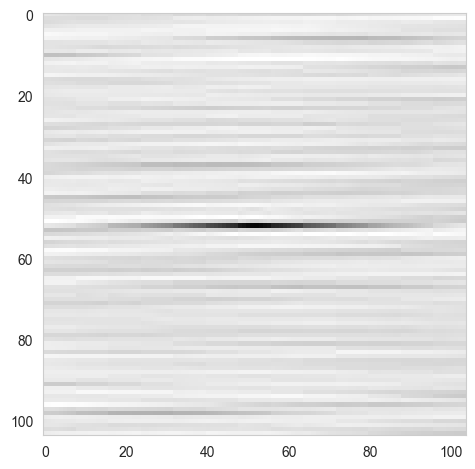

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_21.jpg : [10.57606]


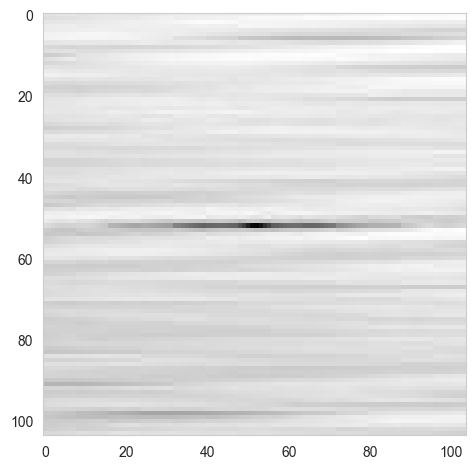

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_23.jpg : [11.141805]


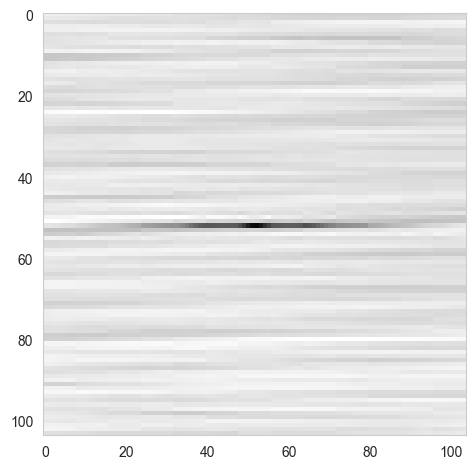

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_24.jpg : [10.576321]


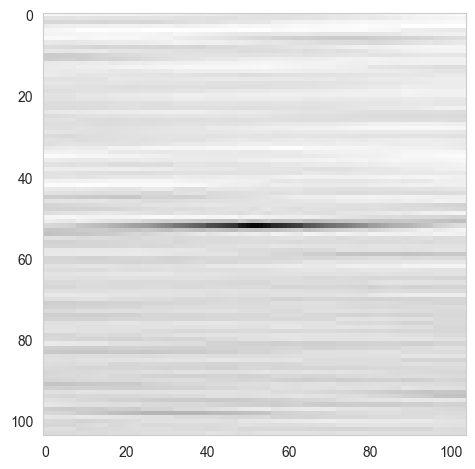

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_26.jpg : [19.488113]


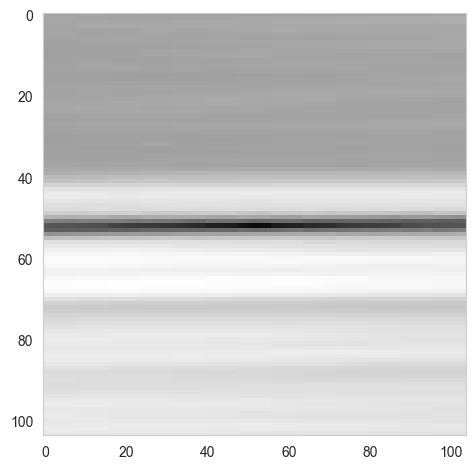

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_41.jpg : [15.075087]


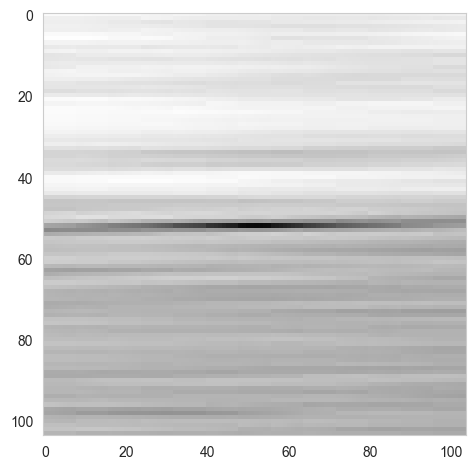

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_49.jpg : [10.977148]


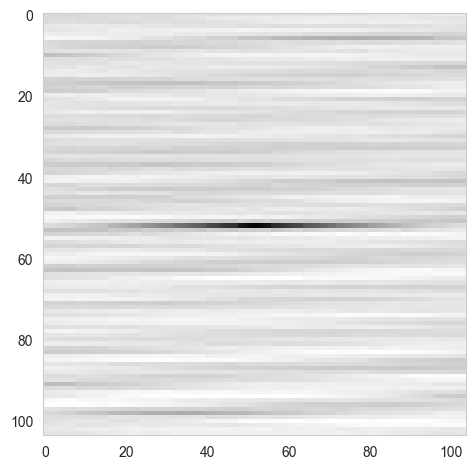

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_52.jpg : [10.221556]


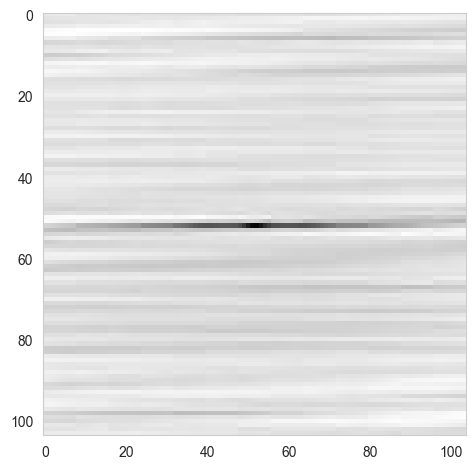

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_11.jpg : [10.215359]


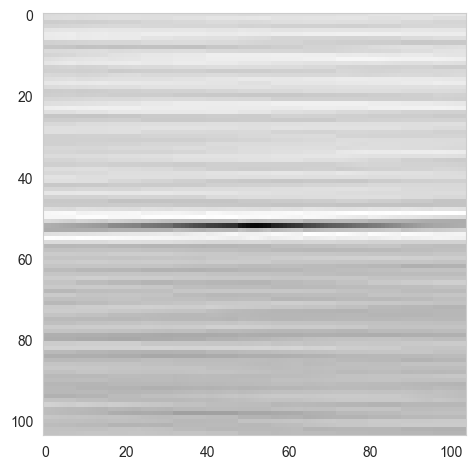

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_15.jpg : [10.764564]


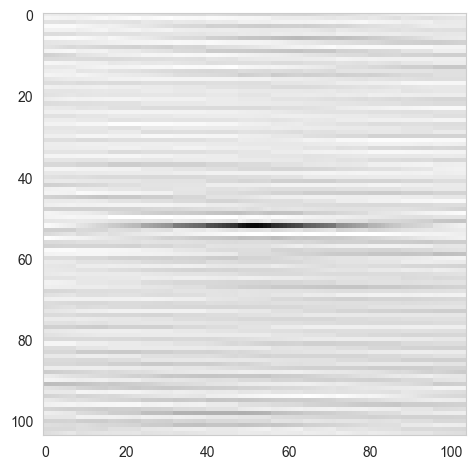

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_24.jpg : [10.559909]


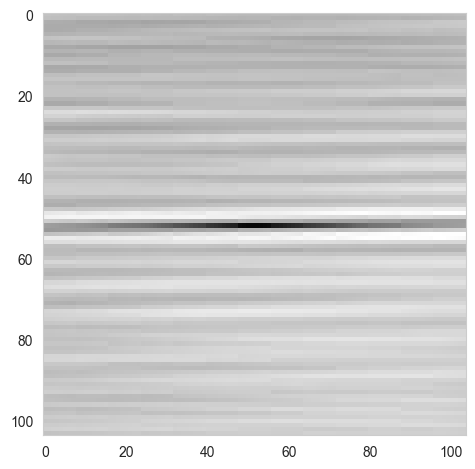

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_26.jpg : [11.414355]


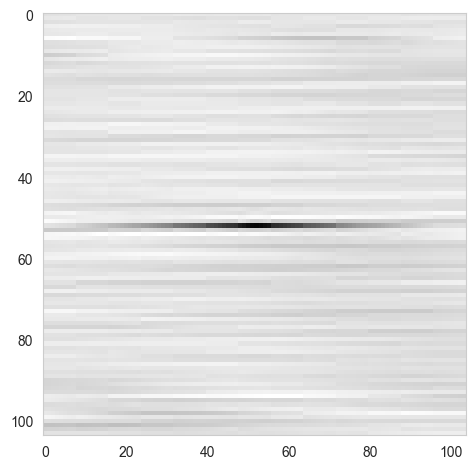

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_28.jpg : [11.221813]


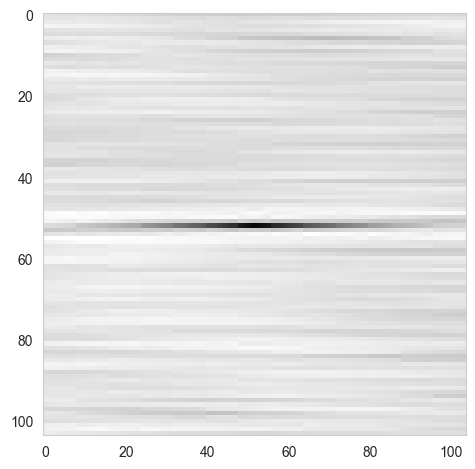

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_31.jpg : [11.2534275]


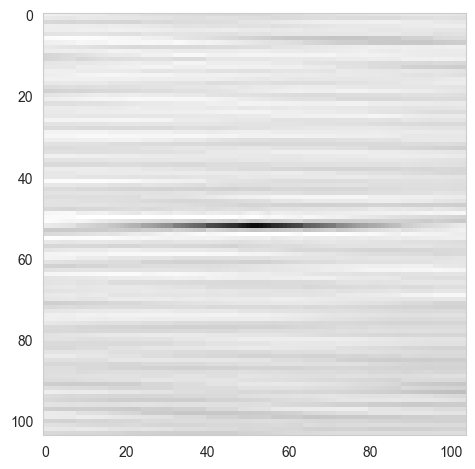

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_39.jpg : [10.093836]


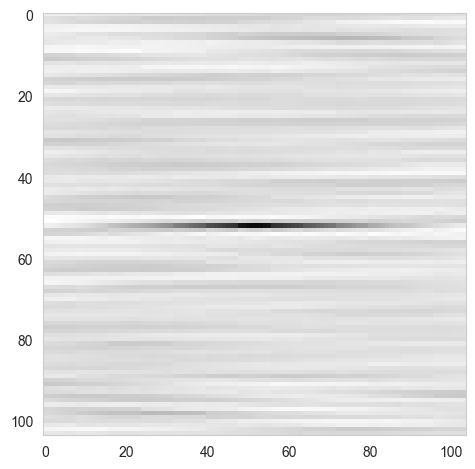

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_41.jpg : [11.104157]


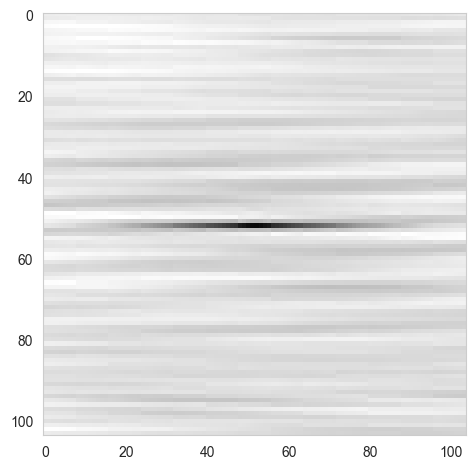

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_42.jpg : [10.068868]


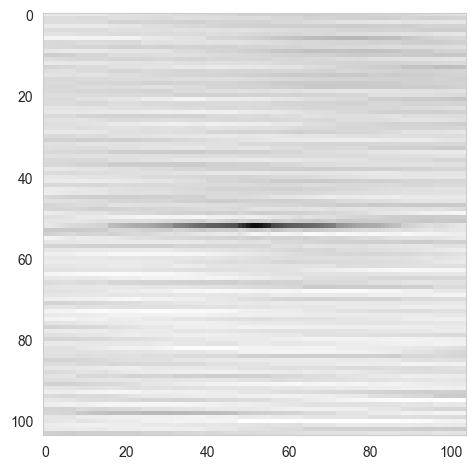

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_44.jpg : [10.40013]


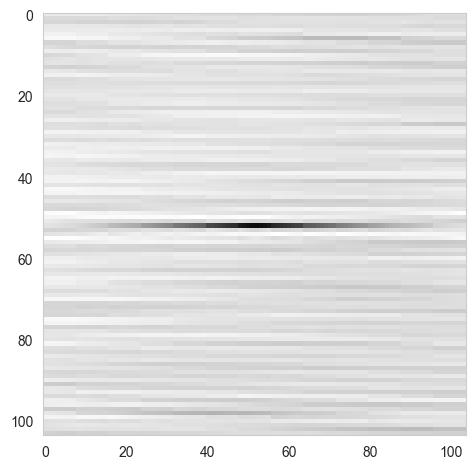

FA0004_GW01_H01_0200_20211108001646_farm_mic_snd_a181c72943b8_02.jpg : [13.929672]


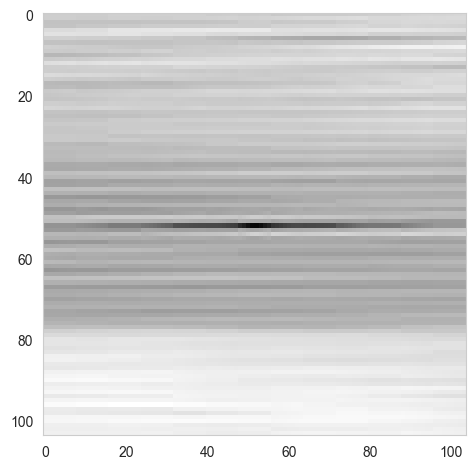

FA0004_GW01_H01_0200_20211108001646_farm_mic_snd_a181c72943b8_15.jpg : [10.919152]


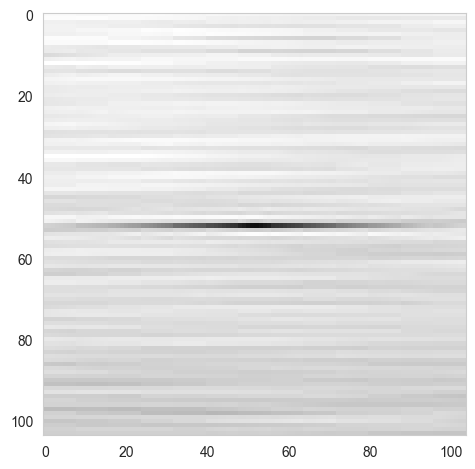

FA0004_GW01_H01_0200_20211108001646_farm_mic_snd_a181c72943b8_34.jpg : [10.06441]


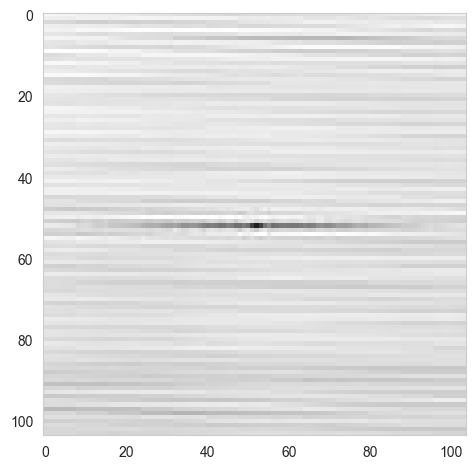

FA0004_GW01_H01_0200_20211108001646_farm_mic_snd_a181c72943b8_43.jpg : [10.539624]


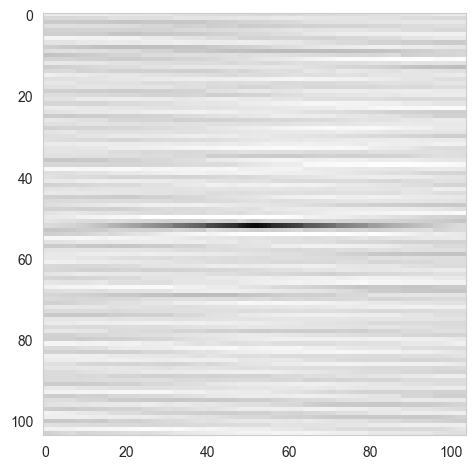

FA0004_GW01_H01_0200_20211108001646_farm_mic_snd_a181c72943b8_46.jpg : [13.7062435]


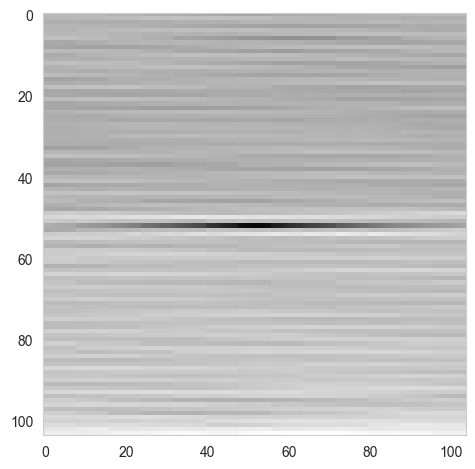

FA0004_GW01_H01_0200_20211108001646_farm_mic_snd_a181c72943b8_47.jpg : [10.912941]


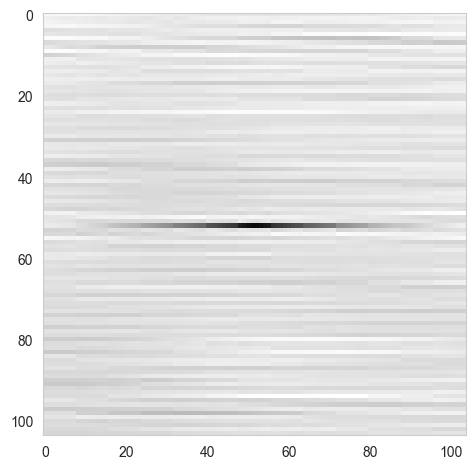

FA0004_GW01_H01_0200_20211108001646_farm_mic_snd_a181c72943b8_50.jpg : [10.031439]


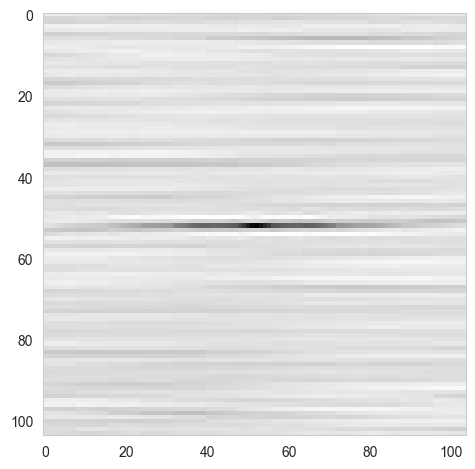

FA0004_GW01_H01_0200_20211108002146_farm_mic_snd_7844d40f4344_05.jpg : [10.647526]


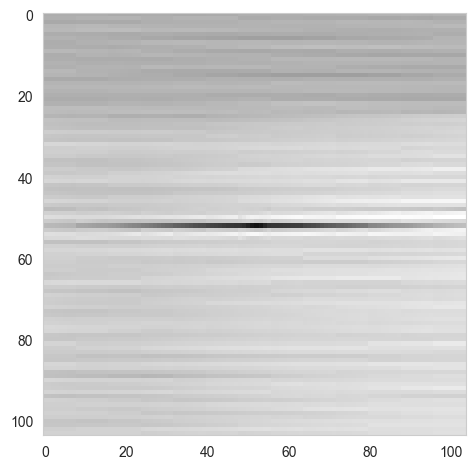

FA0004_GW01_H01_0200_20211108002146_farm_mic_snd_7844d40f4344_40.jpg : [11.056499]


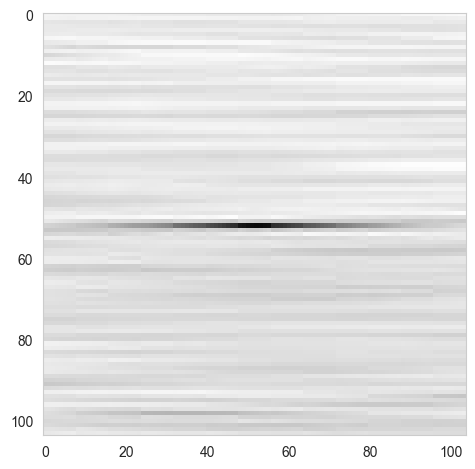

FA0004_GW01_H01_0200_20211108002146_farm_mic_snd_7844d40f4344_45.jpg : [11.303682]


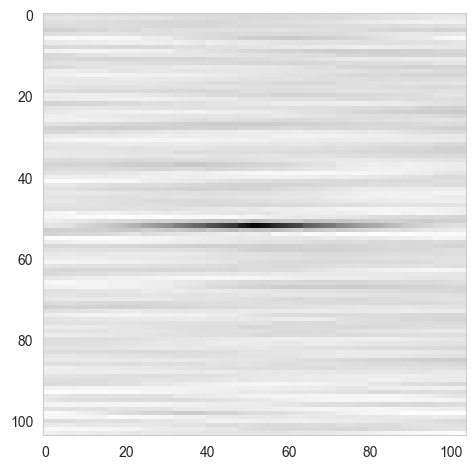

FA0004_GW01_H01_0200_20211108002146_farm_mic_snd_7844d40f4344_47.jpg : [10.657819]


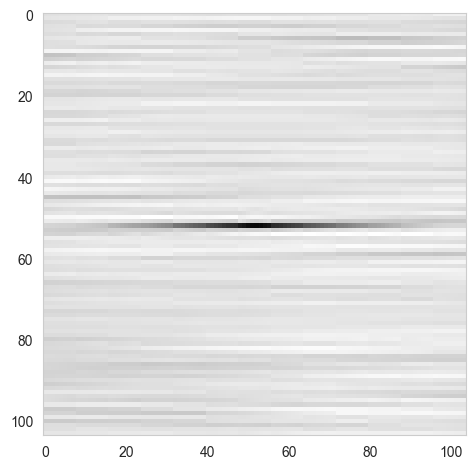

FA0004_GW01_H01_0200_20211108002146_farm_mic_snd_7844d40f4344_49.jpg : [14.225178]


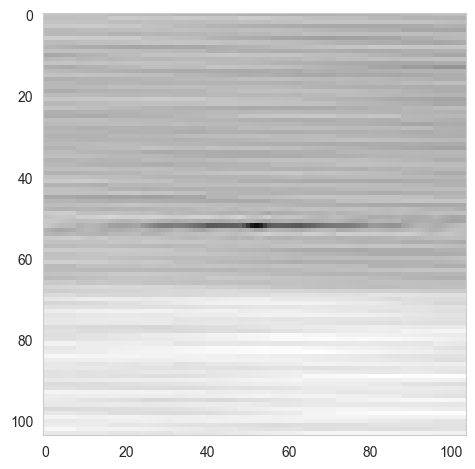

FA0004_GW01_H01_0200_20211108002644_farm_mic_snd_1adc6527448c_55.jpg : [10.791712]


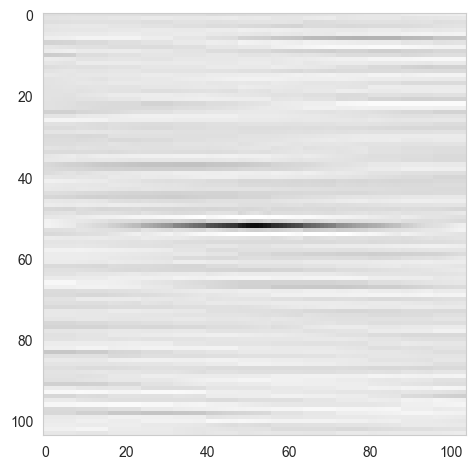

FA0004_GW01_H01_0200_20211108003146_farm_mic_snd_e7ceec4e431e_09.jpg : [11.204328]


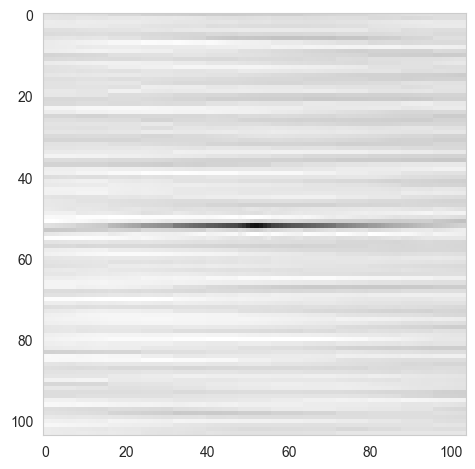

FA0004_GW01_H01_0200_20211108003146_farm_mic_snd_e7ceec4e431e_11.jpg : [12.090527]


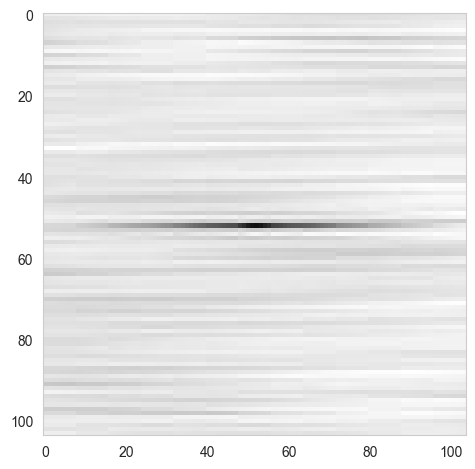

FA0004_GW01_H01_0200_20211108003146_farm_mic_snd_e7ceec4e431e_16.jpg : [10.585684]


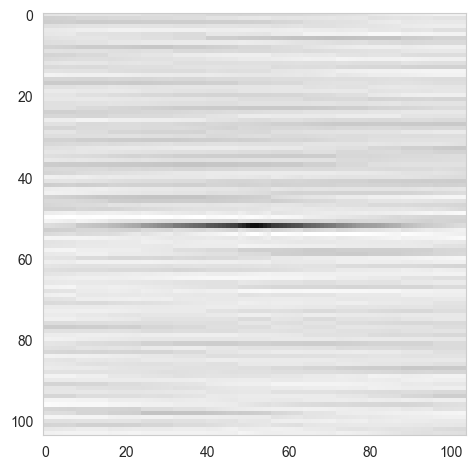

FA0004_GW01_H01_0200_20211108003146_farm_mic_snd_e7ceec4e431e_30.jpg : [10.378661]


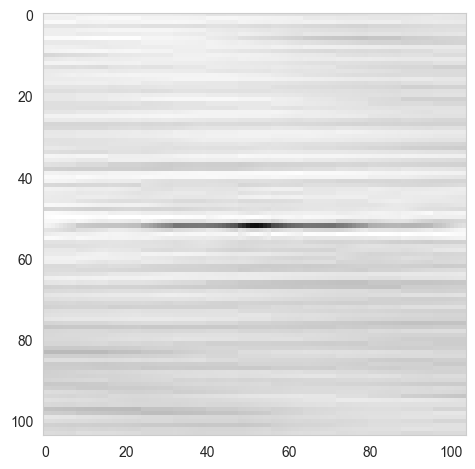

FA0004_GW01_H01_0200_20211108003146_farm_mic_snd_e7ceec4e431e_36.jpg : [10.99288]


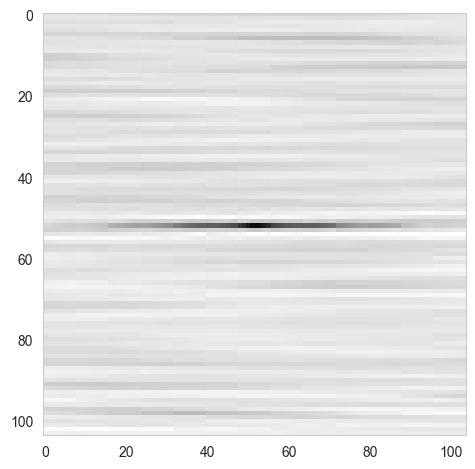

FA0004_GW01_H01_0200_20211108003146_farm_mic_snd_e7ceec4e431e_42.jpg : [10.966397]


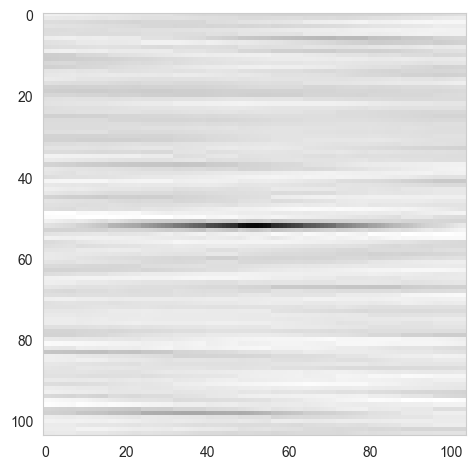

FA0004_GW01_H01_0200_20211108003146_farm_mic_snd_e7ceec4e431e_50.jpg : [10.089495]


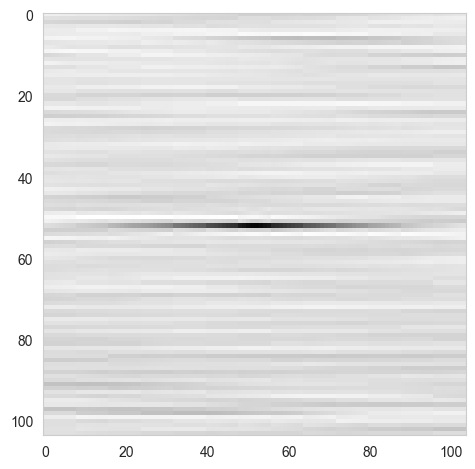

FA0004_GW01_H01_0200_20211108003146_farm_mic_snd_e7ceec4e431e_52.jpg : [10.239548]


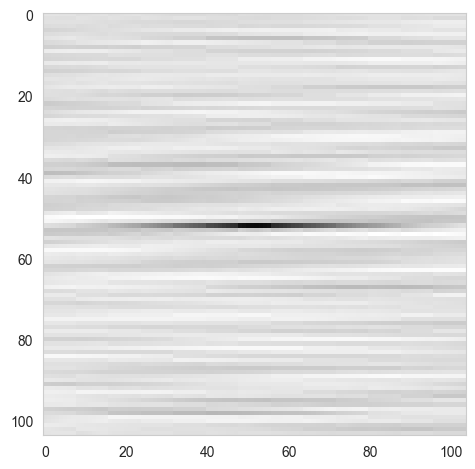

FA0004_GW01_H01_0200_20211108003646_farm_mic_snd_8cbd90df43b7_04.jpg : [10.082047]


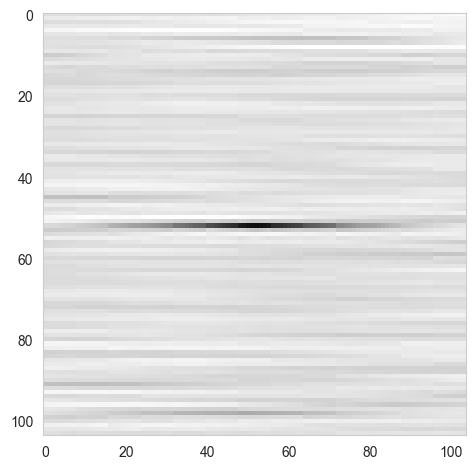

FA0004_GW01_H01_0200_20211108003646_farm_mic_snd_8cbd90df43b7_08.jpg : [10.2235365]


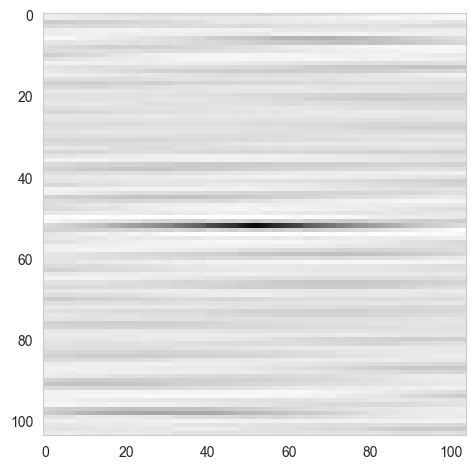

FA0004_GW01_H01_0200_20211108003646_farm_mic_snd_8cbd90df43b7_24.jpg : [10.811462]


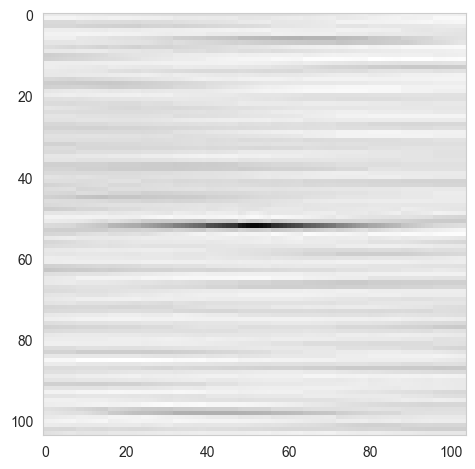

FA0004_GW01_H01_0200_20211108003646_farm_mic_snd_8cbd90df43b7_27.jpg : [11.726371]


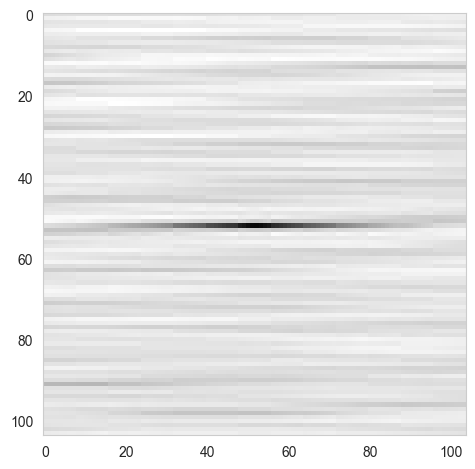

FA0004_GW01_H01_0200_20211108003646_farm_mic_snd_8cbd90df43b7_28.jpg : [10.736477]


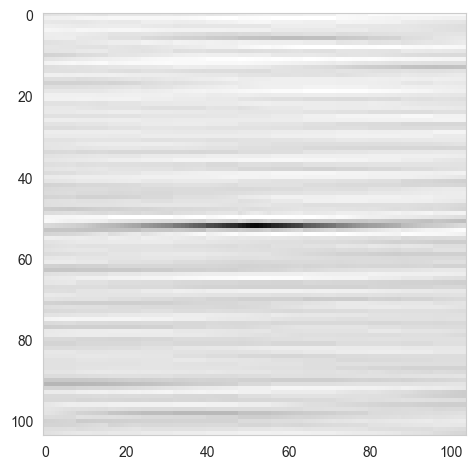

FA0004_GW01_H01_0200_20211108003646_farm_mic_snd_8cbd90df43b7_44.jpg : [10.517015]


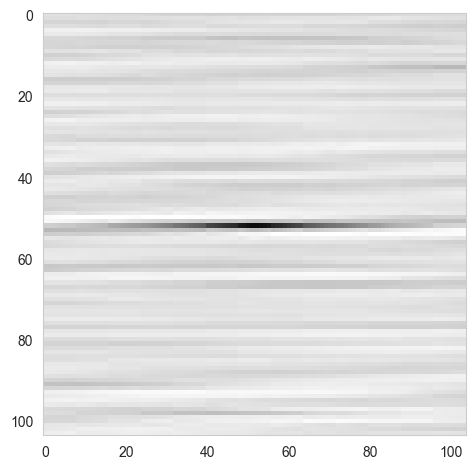

FA0004_GW01_H01_0200_20211108004145_farm_mic_snd_872a8cc44aed_22.jpg : [10.361212]


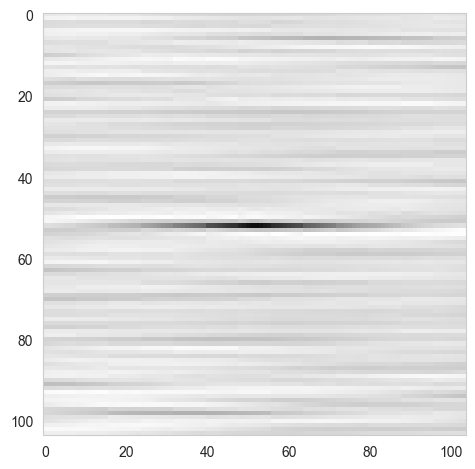

FA0004_GW01_H01_0200_20211108004646_farm_mic_snd_ba6fefda4e6f_22.jpg : [10.1915865]


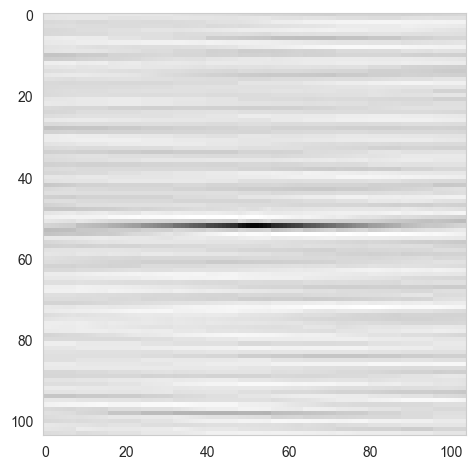

FA0004_GW01_H01_0200_20211108004646_farm_mic_snd_ba6fefda4e6f_53.jpg : [10.009336]


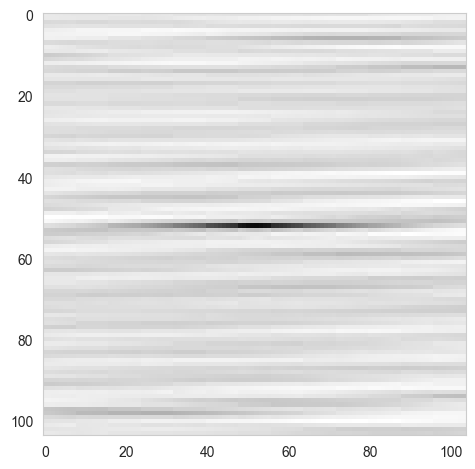

FA0004_GW01_H01_0200_20211108005148_farm_mic_snd_4ee83b8b4549_00.jpg : [11.756051]


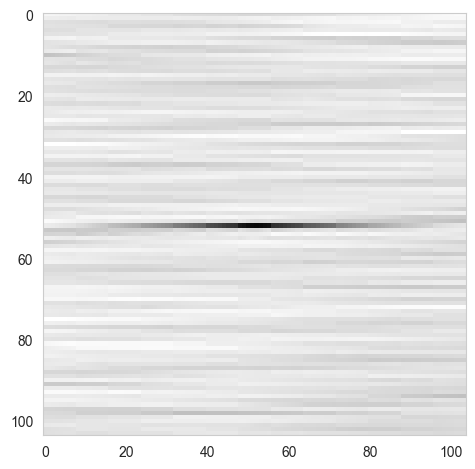

FA0004_GW01_H01_0200_20211108005148_farm_mic_snd_4ee83b8b4549_04.jpg : [36.141167]


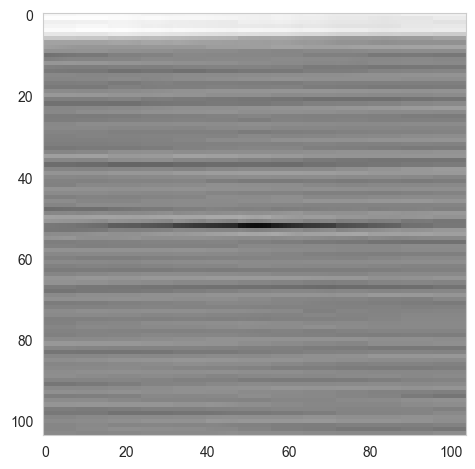

In [24]:
# normal
fileListnormal = rawDf[(rawDf.recon_error > 10.) & (rawDf.recon_error < 45.) & (rawDf.isInfected == 0.0) & (rawDf.fileName.str.contains('0200|0201'))]['fileName'].to_list()
len(fileListnormal)
for idx, aName in enumerate(fileListnormal) : 
    if idx > 50 : break
    # FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_07.jpg
    subdir = aName.split('_')[4][:8]
    aFileName = '../output/ilt_20211108_20211109/normal/' + subdir + '/' + aName
    print(f"{aName} : {rawDf[rawDf.fileName == aName]['recon_error'].values}")
    aImg = plt.imread(aFileName)
    plt.imshow(aImg)
    # plt.axis('off')
    plt.grid(visible=False)
    plt.tight_layout()
    plt.show()

### image abnormal

55

FA0004_GW01_H01_0202_20211108020645_farm_mic_snd_dd483d8e4240_25.jpg : [5.032209]


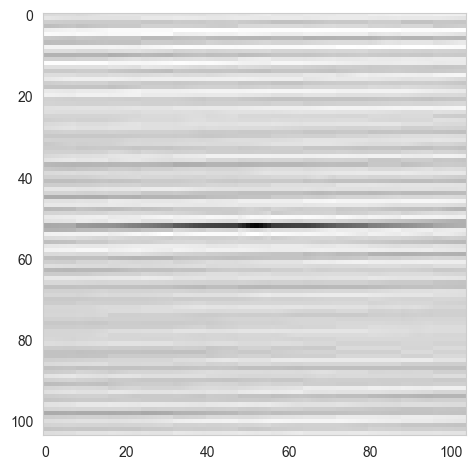

FA0004_GW01_H01_0202_20211108065144_farm_mic_snd_5473959d401d_19.jpg : [6.826992]


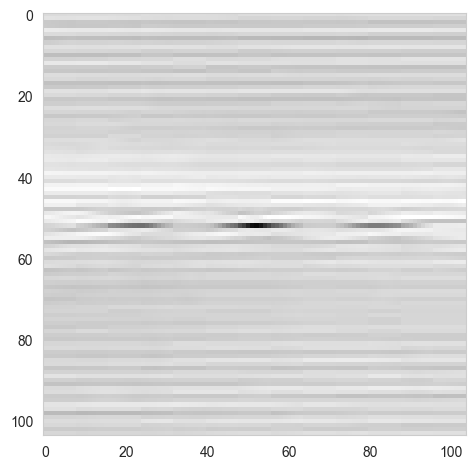

FA0004_GW01_H01_0202_20211108085644_farm_mic_snd_c0f28f0f452d_20.jpg : [9.212209]


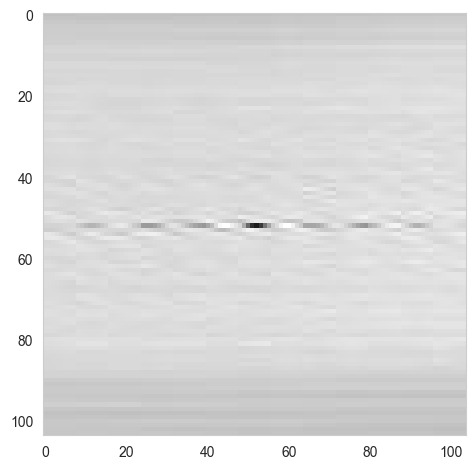

FA0004_GW01_H01_0202_20211108125145_farm_mic_snd_f3ad7c50499e_19.jpg : [9.971002]


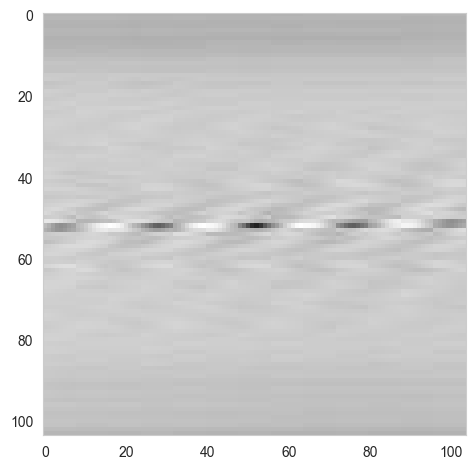

FA0004_GW01_H01_0202_20211108164145_farm_mic_snd_744caeef4f80_10.jpg : [8.014477]


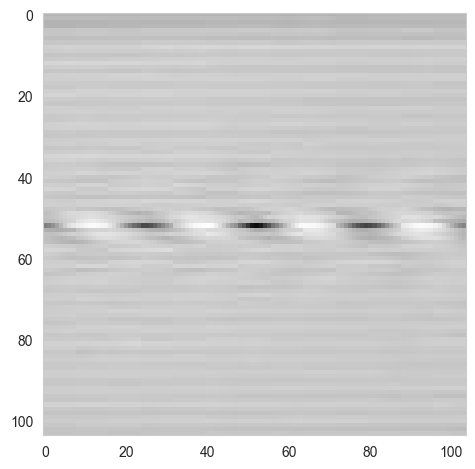

FA0004_GW01_H01_0202_20211108164145_farm_mic_snd_744caeef4f80_50.jpg : [8.976754]


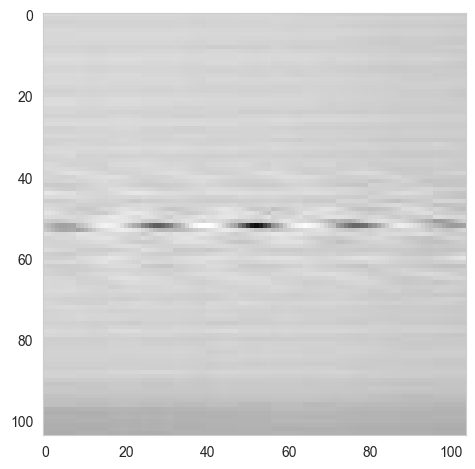

FA0004_GW01_H01_0202_20211108185145_farm_mic_snd_688d9ef84e39_23.jpg : [9.858666]


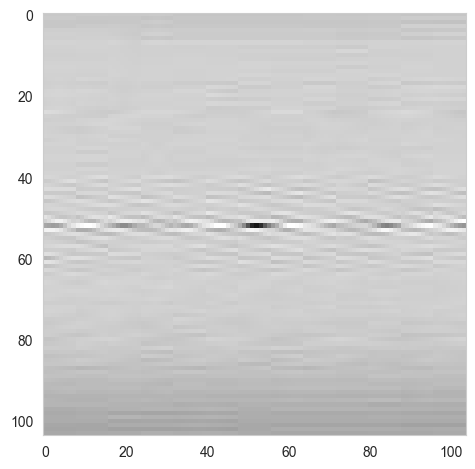

FA0004_GW01_H01_0202_20211109024145_farm_mic_snd_e82a68c4423b_01.jpg : [8.118326]


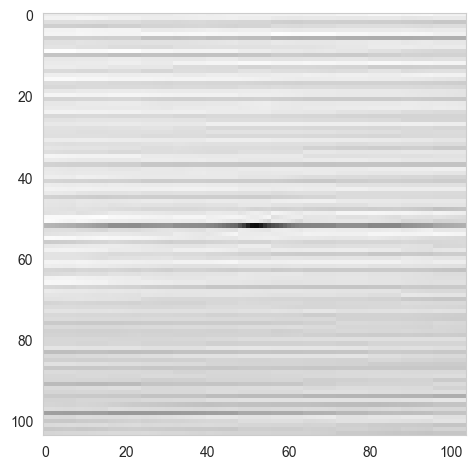

FA0004_GW01_H01_0202_20211109024145_farm_mic_snd_e82a68c4423b_32.jpg : [8.406408]


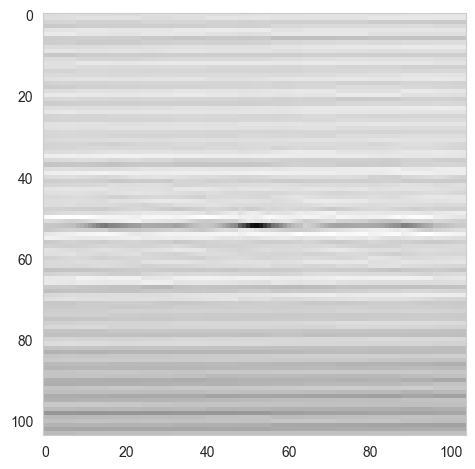

FA0004_GW01_H01_0202_20211109024145_farm_mic_snd_e82a68c4423b_34.jpg : [9.619074]


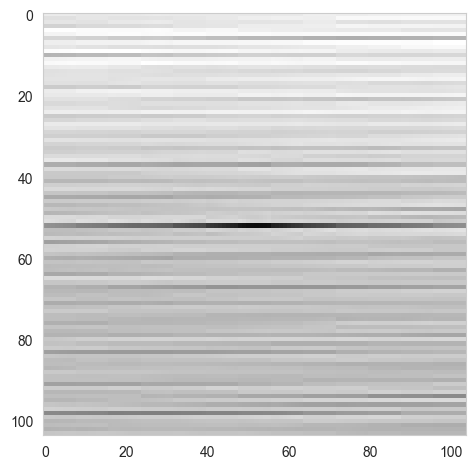

FA0004_GW01_H01_0202_20211109024145_farm_mic_snd_e82a68c4423b_52.jpg : [8.365846]


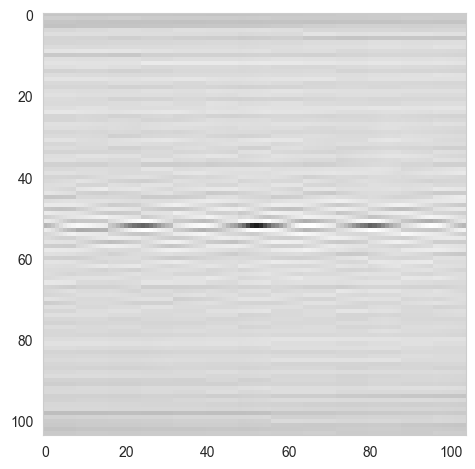

FA0004_GW01_H01_0202_20211109024145_farm_mic_snd_e82a68c4423b_53.jpg : [5.0389795]


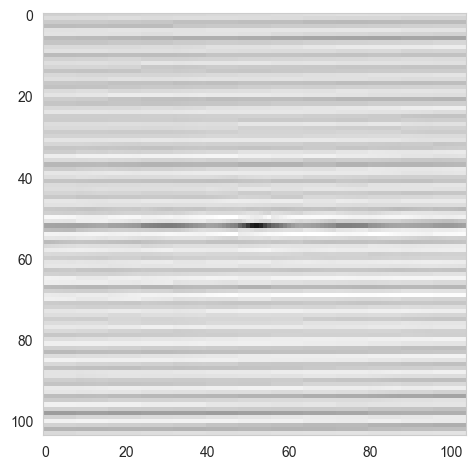

FA0004_GW01_H01_0202_20211109073649_farm_mic_snd_05c05dc14600_01.jpg : [8.293504]


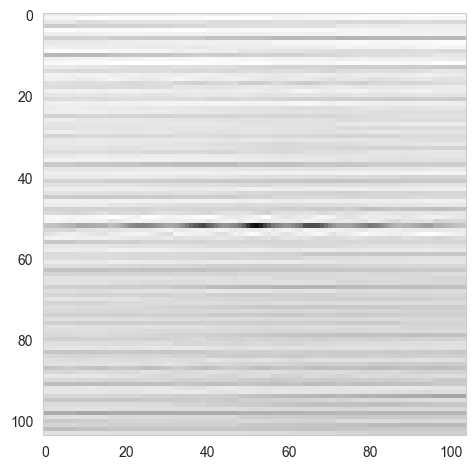

FA0004_GW01_H01_0202_20211109073649_farm_mic_snd_05c05dc14600_17.jpg : [4.366312]


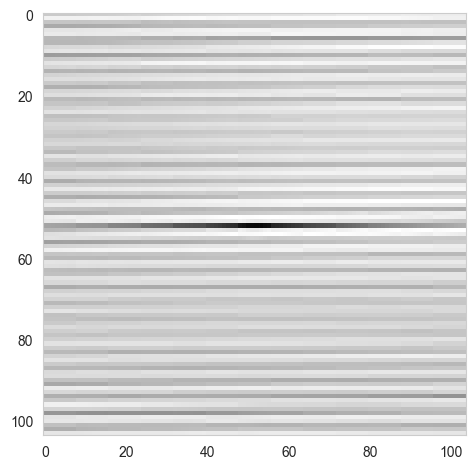

FA0004_GW01_H01_0202_20211109091147_farm_mic_snd_1569b63144e0_22.jpg : [6.9392667]


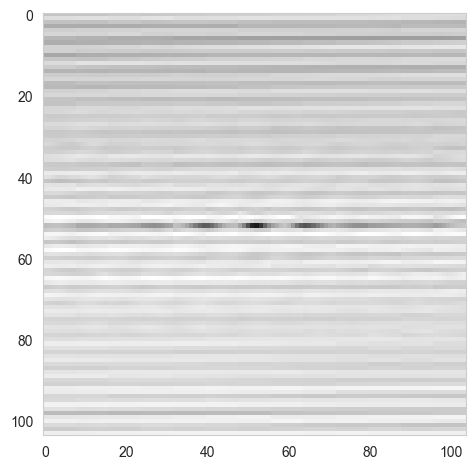

FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101_41.jpg : [7.052295]


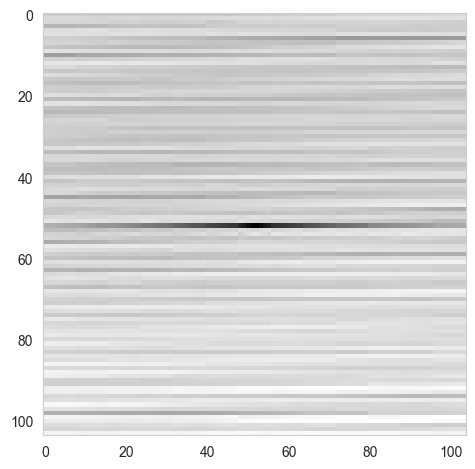

FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101_51.jpg : [6.4842935]


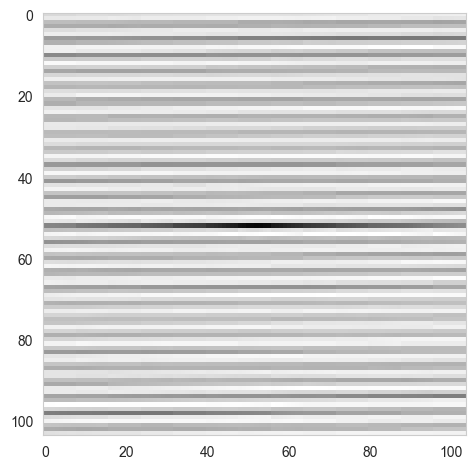

FA0004_GW01_H01_0202_20211109092647_farm_mic_snd_7a099f0d49da_19.jpg : [3.7835395]


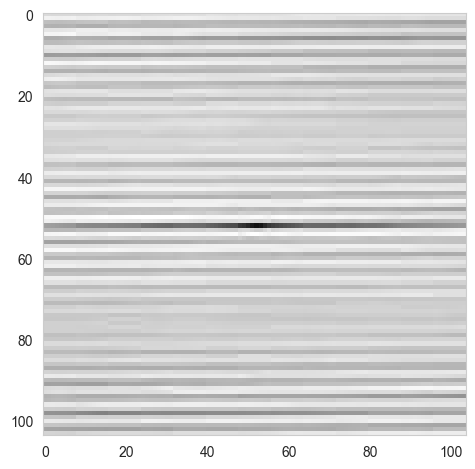

FA0004_GW01_H01_0202_20211109092647_farm_mic_snd_7a099f0d49da_20.jpg : [5.2964892]


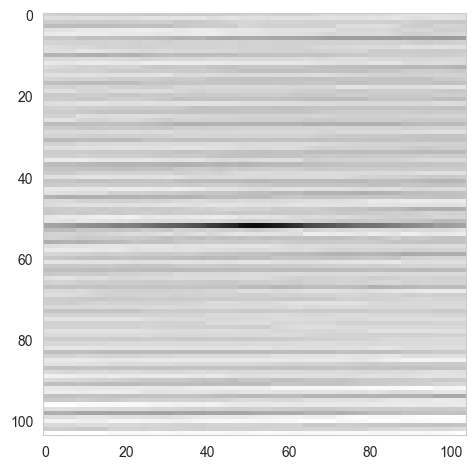

FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741_22.jpg : [9.678527]


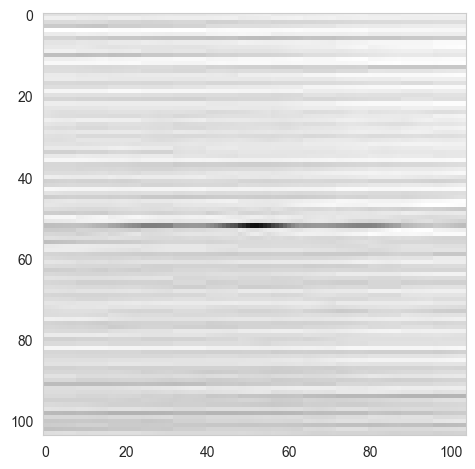

FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741_23.jpg : [8.557959]


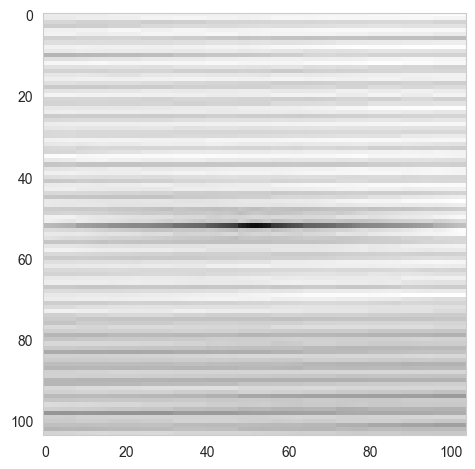

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_01.jpg : [4.159344]


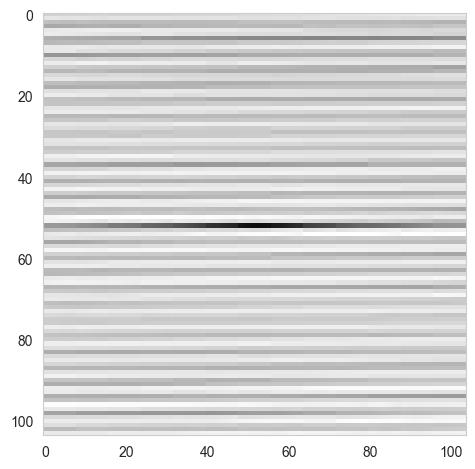

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_09.jpg : [7.461302]


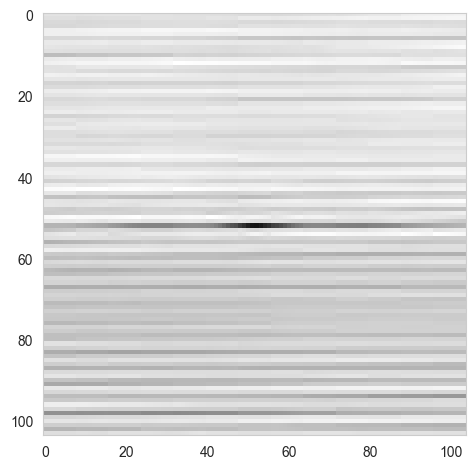

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_10.jpg : [7.1298847]


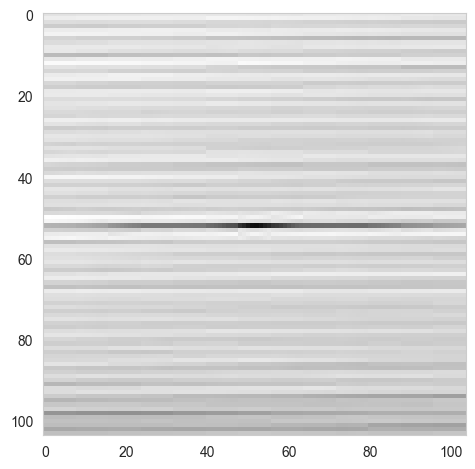

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_20.jpg : [6.4186697]


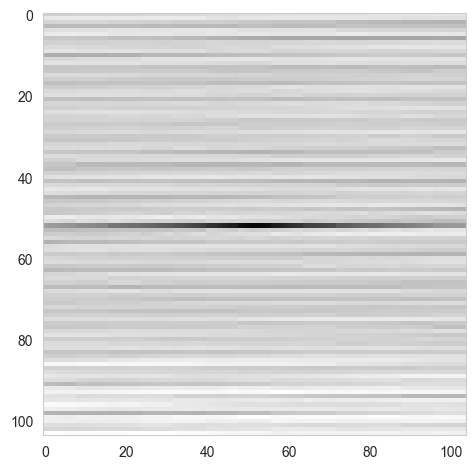

FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c_10.jpg : [9.730662]


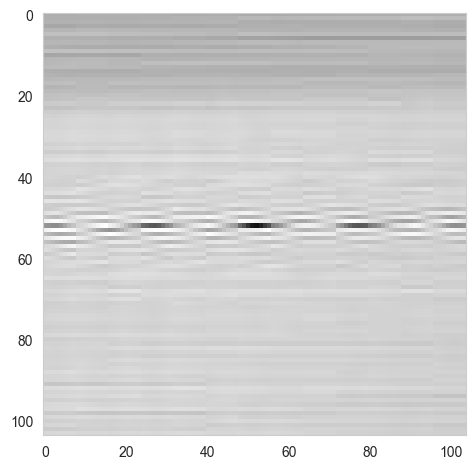

FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c_25.jpg : [8.71405]


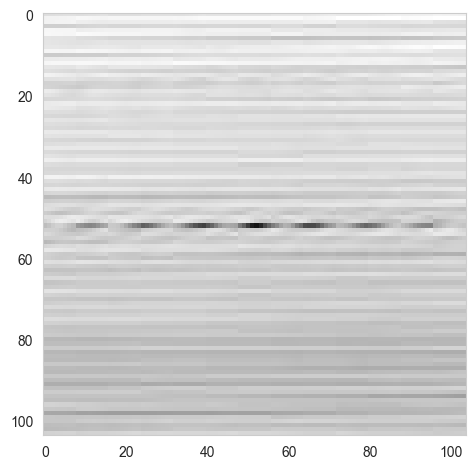

FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c_51.jpg : [8.495981]


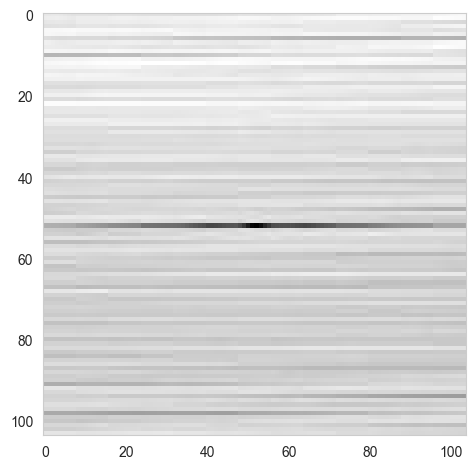

FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c_57.jpg : [7.1284976]


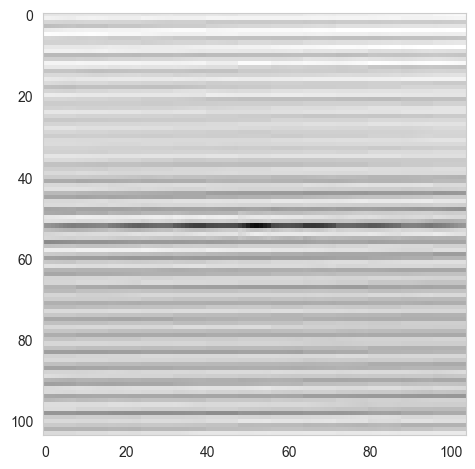

FA0004_GW01_H01_0202_20211109113648_farm_mic_snd_5c7055cd4535_19.jpg : [8.597868]


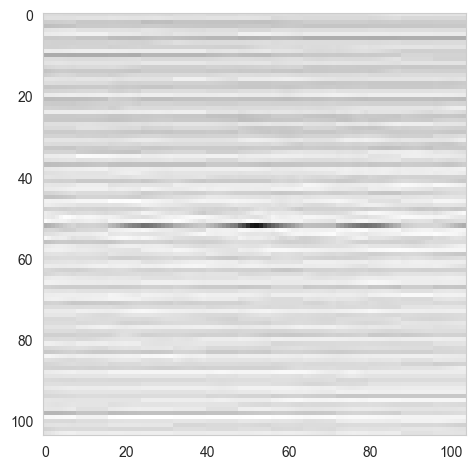

FA0004_GW01_H01_0202_20211109113648_farm_mic_snd_5c7055cd4535_28.jpg : [8.479689]


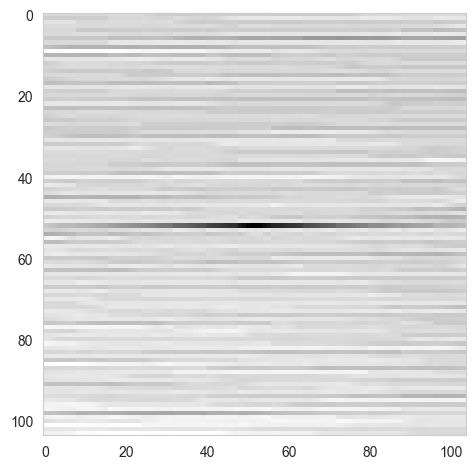

FA0004_GW01_H01_0202_20211109113648_farm_mic_snd_5c7055cd4535_41.jpg : [9.201271]


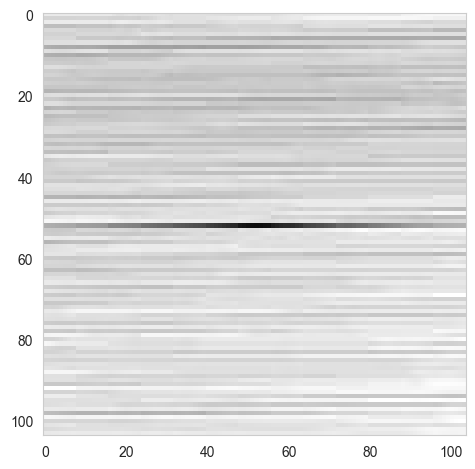

FA0004_GW01_H01_0202_20211109113648_farm_mic_snd_5c7055cd4535_50.jpg : [8.140997]


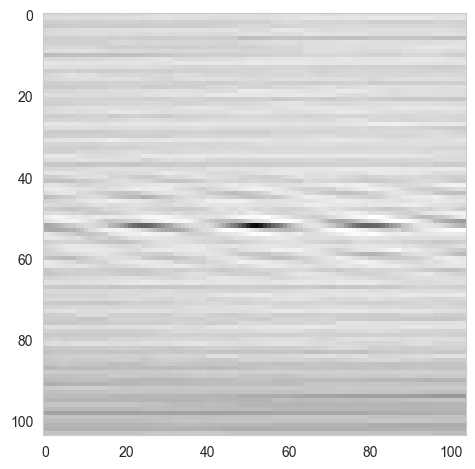

FA0004_GW01_H01_0202_20211109113648_farm_mic_snd_5c7055cd4535_51.jpg : [9.484429]


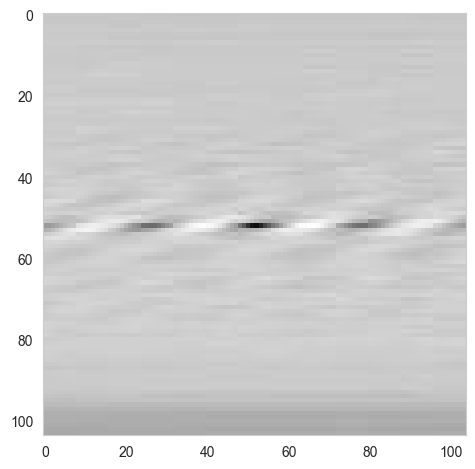

FA0004_GW01_H01_0202_20211109121148_farm_mic_snd_205bc5a648e9_29.jpg : [8.562872]


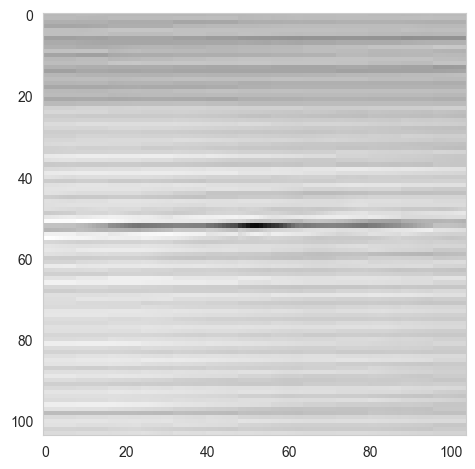

FA0004_GW01_H01_0202_20211109141145_farm_mic_snd_ccd03cf14804_30.jpg : [9.999348]


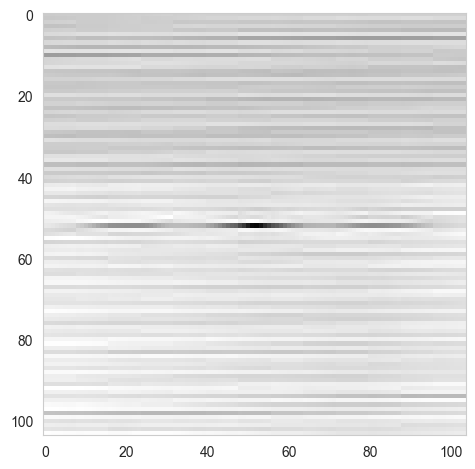

FA0004_GW01_H01_0202_20211109141145_farm_mic_snd_ccd03cf14804_31.jpg : [9.691819]


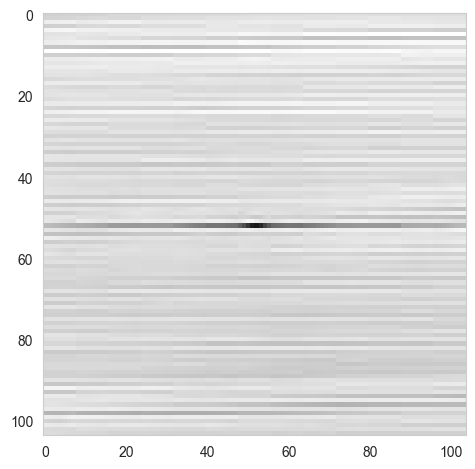

FA0004_GW01_H01_0202_20211109141145_farm_mic_snd_ccd03cf14804_39.jpg : [8.975357]


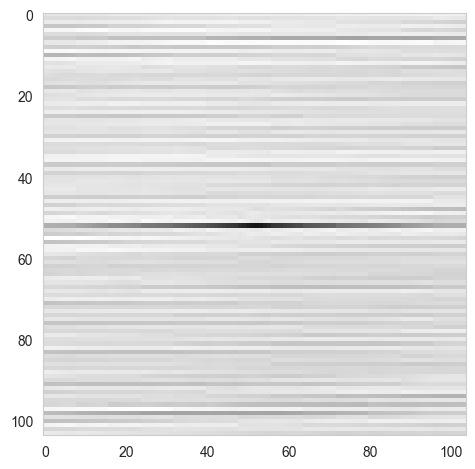

FA0004_GW01_H01_0202_20211109141145_farm_mic_snd_ccd03cf14804_48.jpg : [6.2270246]


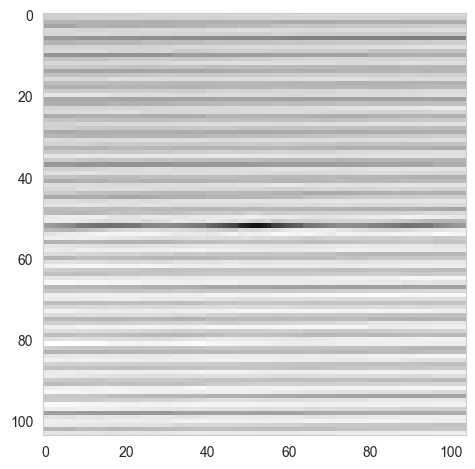

FA0004_GW01_H01_0202_20211109143144_farm_mic_snd_d7dc95c843db_51.jpg : [7.7805643]


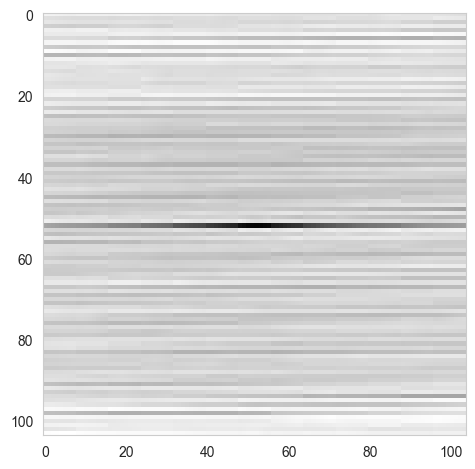

FA0004_GW01_H01_0202_20211109145646_farm_mic_snd_96c753214df8_53.jpg : [4.410203]


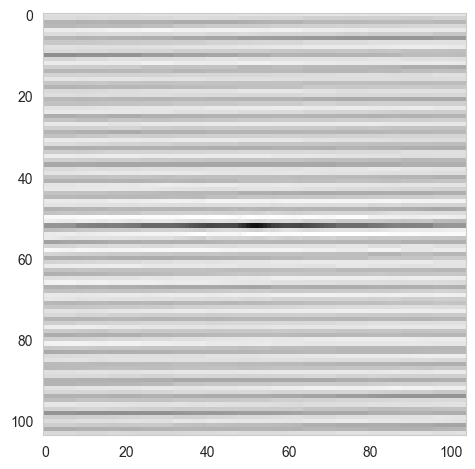

FA0004_GW01_H01_0202_20211109151647_farm_mic_snd_fe5713a7443c_58.jpg : [6.9009037]


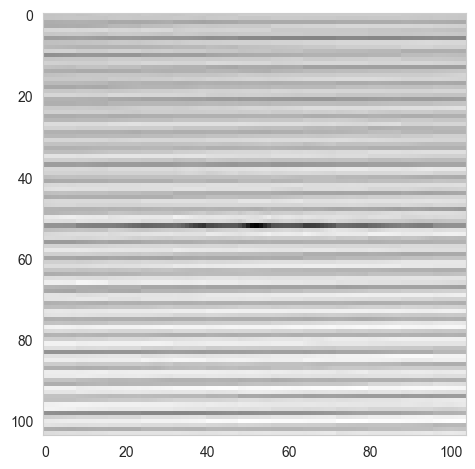

FA0004_GW01_H01_0202_20211109171645_farm_mic_snd_c1b7e5ec412b_25.jpg : [9.2506895]


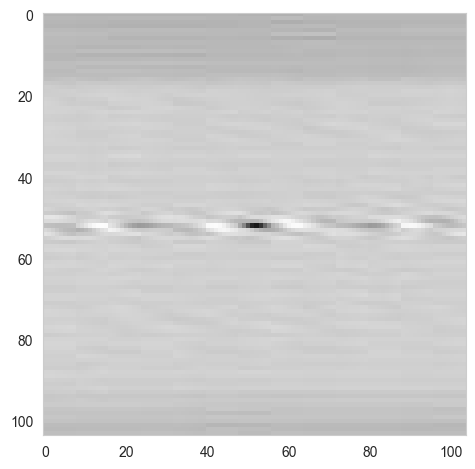

FA0004_GW01_H01_0202_20211109174646_farm_mic_snd_b7b2ac384aa9_10.jpg : [9.823266]


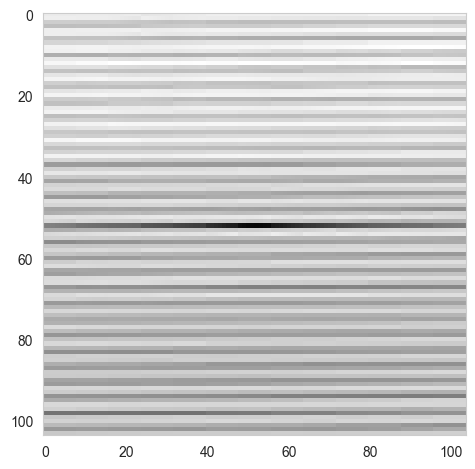

FA0004_GW01_H01_0202_20211109180146_farm_mic_snd_aac2e24e4362_28.jpg : [5.838175]


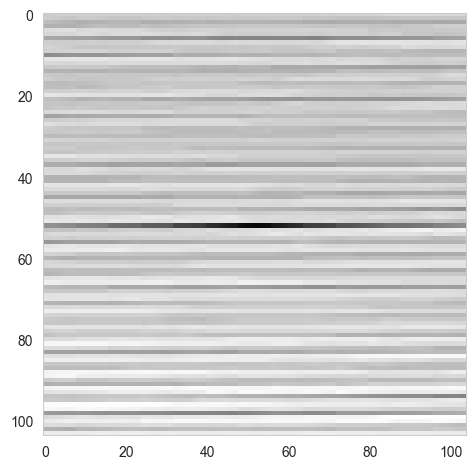

FA0004_GW01_H01_0202_20211109180146_farm_mic_snd_aac2e24e4362_35.jpg : [9.608823]


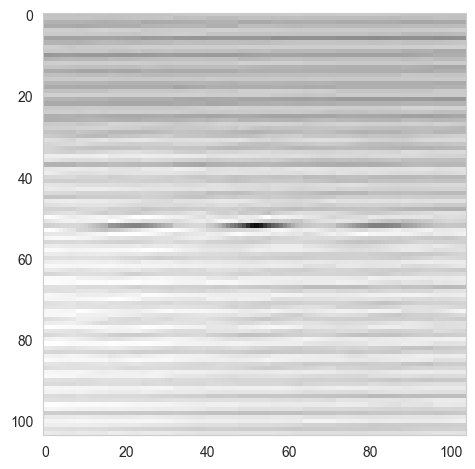

FA0004_GW01_H01_0202_20211109180146_farm_mic_snd_aac2e24e4362_50.jpg : [5.2804117]


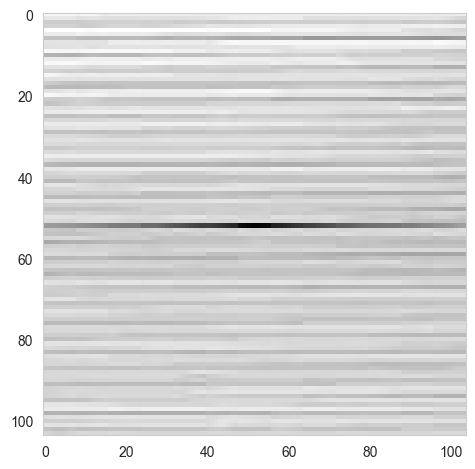

FA0004_GW01_H01_0202_20211109204145_farm_mic_snd_8e82c14b4e7a_25.jpg : [7.941652]


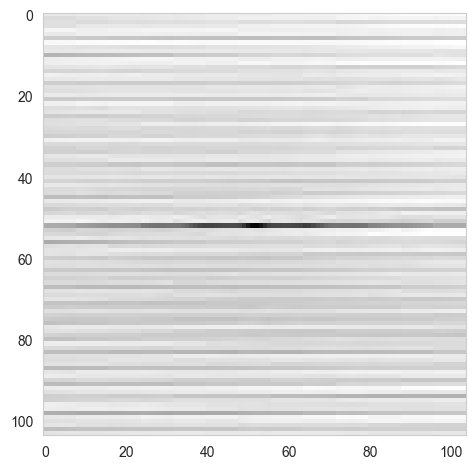

FA0004_GW01_H01_0202_20211109204145_farm_mic_snd_8e82c14b4e7a_26.jpg : [7.0447335]


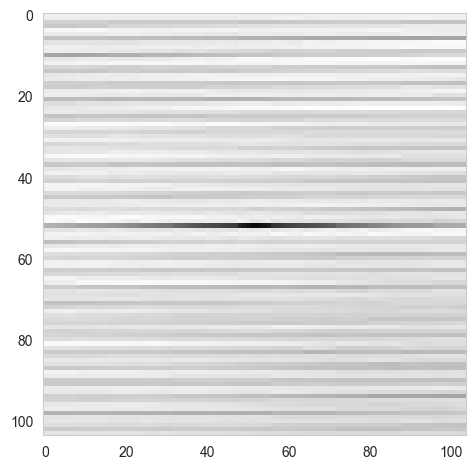

FA0004_GW01_H01_0202_20211109211157_farm_mic_snd_532a48864ac9_13.jpg : [8.192836]


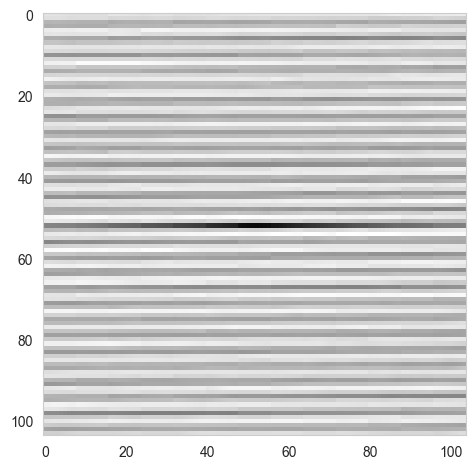

FA0004_GW01_H01_0202_20211109211157_farm_mic_snd_532a48864ac9_32.jpg : [9.718103]


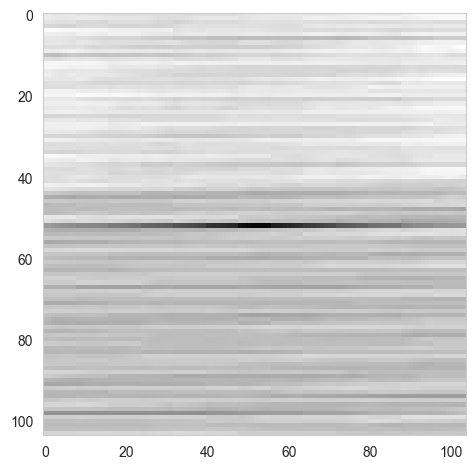

In [57]:
# abnormal
fileListabnormal = rawDf[(rawDf.recon_error > 10.) & (rawDf.recon_error < 30.) & (rawDf.isInfected == 1.0)]['fileName'].to_list()
fileListabnormal = rawDf[(rawDf.recon_error < 10.) & (rawDf.isInfected == 1.0)]['fileName'].to_list()
len(fileListabnormal)
for idx, aName in enumerate(fileListabnormal) : 
    if idx > 50 : break
    aFileName = '../output/ilt_20211108_20211109/abnormal/' + aName
    print(f"{aName} : {rawDf[rawDf.fileName == aName]['recon_error'].values}")
    aImg = plt.imread(aFileName)
    plt.imshow(aImg)
    # plt.axis('off')
    plt.grid(visible=False)
    plt.tight_layout()
    plt.show()

### TSNE

In [53]:
rawDf['t_v'][0]
rawDf['lv'][0]

array([-0.8657598 ,  0.26836744,  0.2985441 ,  0.29884824])

array([0.33124253, 0.5732816 , 0.6453665 , 0.4024513 , 0.47623506,
       0.2726389 , 0.42006326, 0.3450906 , 0.39779136, 0.6339711 ,
       0.5199055 , 0.84570706, 0.2617078 , 0.47793865, 0.45377466,
       0.40832686, 0.3887878 , 0.36550468, 0.49088636, 0.5849173 ,
       0.47229493, 0.4700383 , 0.44692028, 0.57796973, 0.4966063 ,
       0.5984291 , 0.29739726, 0.5512095 , 0.2944901 , 0.44328123,
       0.29283994, 0.5326754 ])

In [52]:
rawDf['t_v'] = [np.fromstring(x[2:-2], sep = ' ') for x in rawDf.t_v]
rawDf['lv'] = [np.fromstring(x[1:-1], sep = ' ') for x in rawDf.lv]

In [54]:
rawDf.head(2)

Unnamed: 0                                           fileName  recon_error  \
0           0  FA0004_GW01_H01_0202_20211108000647_farm_mic_s...     8.563087   
1           1  FA0004_GW01_H01_0202_20211108000647_farm_mic_s...     6.014207   

                                               t_v  \
0  [-0.8657598, 0.26836744, 0.2985441, 0.29884824]   
1   [-0.8657811, 0.26920158, 0.2981452, 0.2984343]   

                                                  lv  isInfected  \
0  [0.33124253, 0.5732816, 0.6453665, 0.4024513, ...         0.0   
1  [0.3567784, 0.32091618, 0.6110509, 0.27929252,...         0.0   

           createTime  
0 2021-11-08 00:06:47  
1 2021-11-08 00:06:47

In [72]:
from sklearn.preprocessing import StandardScaler
X_test_results_test = list(zip(rawDf.recon_error,rawDf.t_v, rawDf.lv))
X_test_results_test = [[x[0], *x[1].flatten(),*x[2].flatten()] for x in X_test_results_test]
#X_test_results_test = [list(x[1].flatten()) for x in X_test_results_test]
# X_test_results_test

X_test_results_test = StandardScaler().fit(X_test_results_test).transform(X_test_results_test)
X_test_results_test
len(X_test_results_test)

array([[ 0.12119767, -0.09805433,  0.08438158, ..., -0.44675998,
        -1.61671327,  0.25112139],
       [-0.45027056, -1.19107548,  1.23837644, ..., -0.46560974,
         1.56270625, -0.08828514],
       [-0.32739047, -0.3669478 ,  0.36400543, ...,  0.65077945,
         0.28487853, -1.4599436 ],
       ...,
       [-0.16494843,  0.62549487, -0.6542587 , ..., -1.4469006 ,
         0.61499961,  0.81510713],
       [-0.75007992, -0.14423832,  0.13191708, ..., -0.89204967,
        -1.13317004,  0.60562525],
       [ 1.01699754,  0.03536609, -0.05101713, ...,  0.11123619,
        -0.46971437, -0.1296249 ]])

116761

In [73]:
from sklearn.manifold import TSNE

# t-SNE 모델 생성 및 학습
tsne = TSNE(n_components=2, random_state=0, verbose=1, perplexity=100, n_iter=250)
digits_tsne_test = tsne.fit_transform(X_test_results_test)

/Users/hansgun/.pyenv/versions/3.9.14/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/hansgun/.pyenv/versions/3.9.14/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 116761 samples in 0.001s...
[t-SNE] Computed neighbors for 116761 samples in 150.812s...
[t-SNE] Computed conditional probabilities for sample 1000 / 116761
[t-SNE] Computed conditional probabilities for sample 2000 / 116761
[t-SNE] Computed conditional probabilities for sample 3000 / 116761
[t-SNE] Computed conditional probabilities for sample 4000 / 116761
[t-SNE] Computed conditional probabilities for sample 5000 / 116761
[t-SNE] Computed conditional probabilities for sample 6000 / 116761
[t-SNE] Computed conditional probabilities for sample 7000 / 116761
[t-SNE] Computed conditional probabilities for sample 8000 / 116761
[t-SNE] Computed conditional probabilities for sample 9000 / 116761
[t-SNE] Computed conditional probabilities for sample 10000 / 116761
[t-SNE] Computed conditional probabilities for sample 11000 / 116761
[t-SNE] Computed conditional probabilities for sample 12000 / 116761
[t-SNE] Computed conditional prob

In [74]:
rawDf.isInfected.value_counts()
colors_pred_test = np.where(rawDf['isInfected'] == 1.0, 'abnormal','normal')
_colors_pred_test = np.where(rawDf['isInfected']  == 1.0, 'red','green')
normal_index = np.where(colors_pred_test =='normal')[0].tolist()
abnormal_index = np.where(colors_pred_test =='abnormal')[0].tolist()

0.0    116420
1.0       341
Name: isInfected, dtype: int64

#### standard scaler

<Figure size 1600x1000 with 0 Axes>

Text(0.5, 1.0, 'normal')

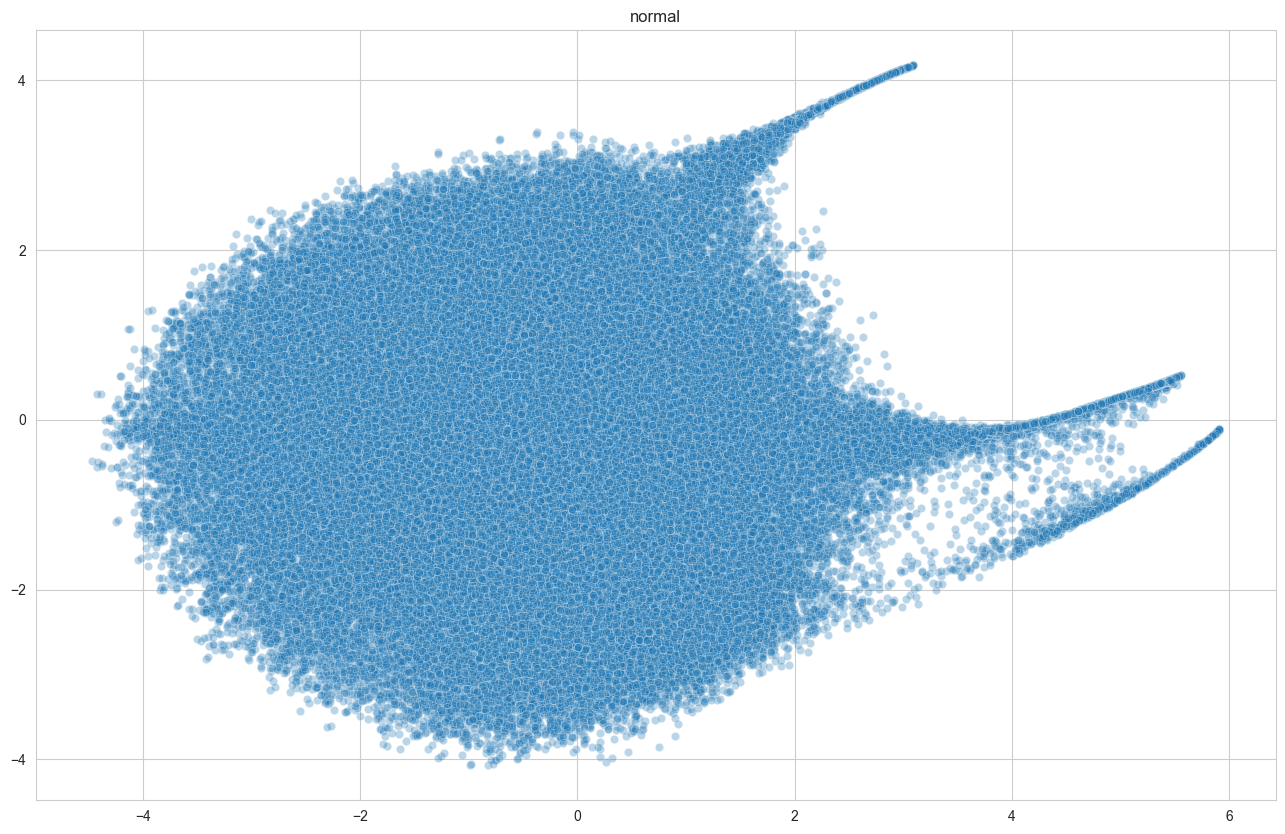

<Figure size 1600x1000 with 0 Axes>

Text(0.5, 1.0, 'abnormal')

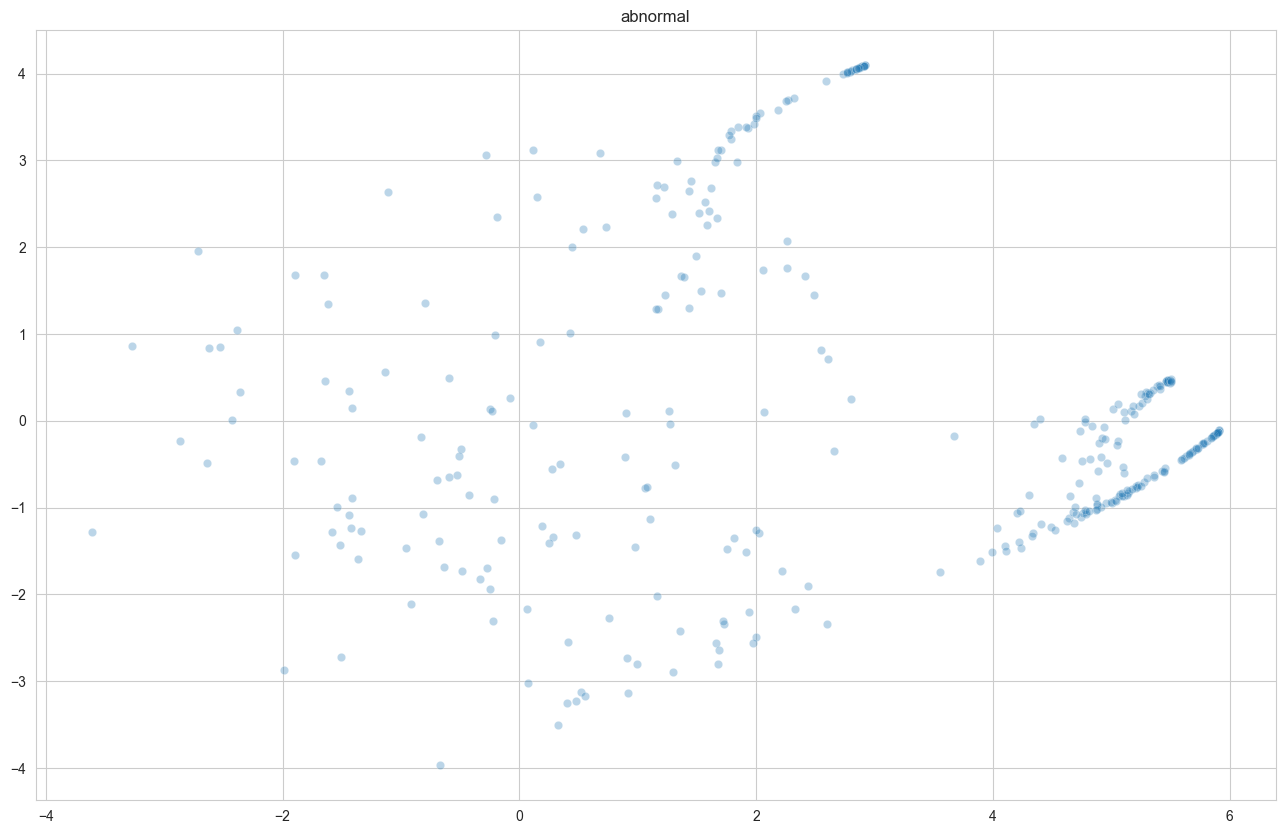

<Figure size 1600x1000 with 0 Axes>

Text(0.5, 1.0, 'all')

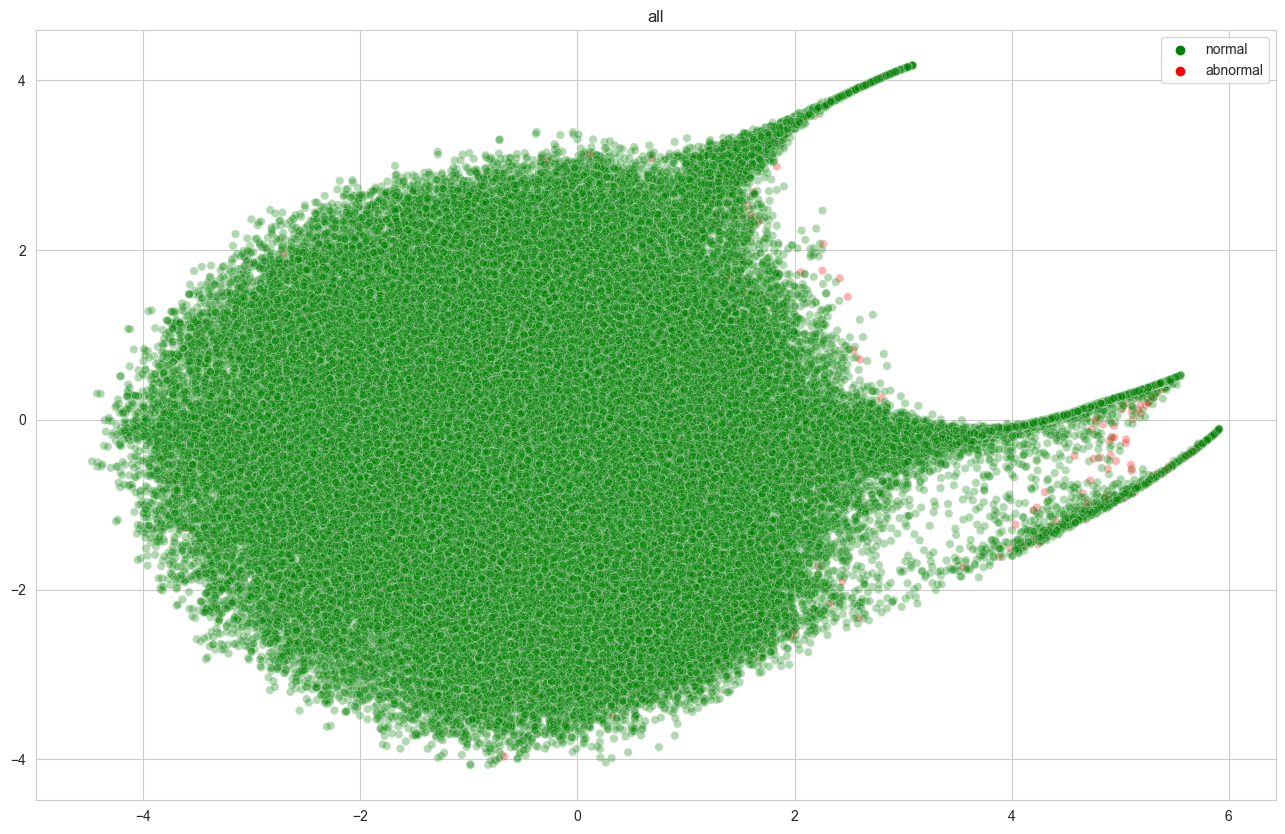

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
# circle1 = plt.Circle(xy=(0, 0), radius=53, color='red', fill=False)
ax = sns.scatterplot(
    x=digits_tsne_test[normal_index,0], y=digits_tsne_test[normal_index,1],
    # palette=sns.color_palette("hls", 2),hue=colors_pred_test, 
    legend="full",
    alpha=0.3
)

# ax.add_patch(circle1)
# ax.set(xlim=(-20, 30))
# ax.set(ylim=(-100, 100));
plt.title("normal")
plt.show() 

plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
# circle1 = plt.Circle(xy=(0, 0), radius=53, color='red', fill=False)
ax = sns.scatterplot(
    x=digits_tsne_test[abnormal_index,0], y=digits_tsne_test[abnormal_index,1],
    # palette=sns.color_palette("hls", 2),hue=colors_pred_test, 
    legend="full",
    alpha=0.3
)

# ax.add_patch(circle1)
# ax.set(xlim=(-20, 30))
# ax.set(ylim=(-100, 100));
plt.title("abnormal")
plt.show() 

plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
ax = sns.scatterplot(
    x=digits_tsne_test[:,0], y=digits_tsne_test[:,1],
    palette=['green','red'],hue=colors_pred_test, 
    legend="full",
    alpha=0.3
)

# ax.add_patch(circle1)
# ax.set(xlim=(-20, 30))
# ax.set(ylim=(-100, 100));
plt.title("all")
plt.show() 




#### radius setting

In [141]:
cRadius = 3.4

<Figure size 1000x700 with 0 Axes>

Text(0.5, 1.0, 'all')

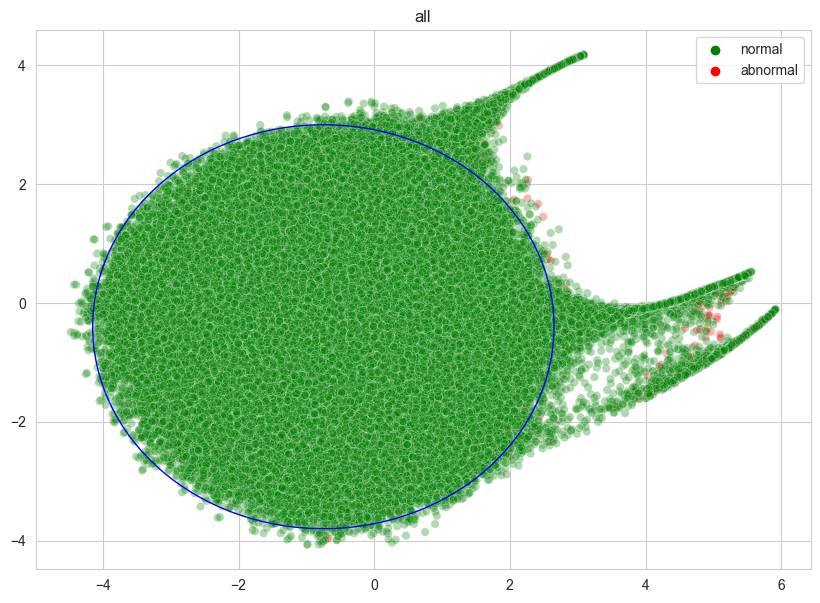

In [159]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
ax = sns.scatterplot(
    x=digits_tsne_test[:,0], y=digits_tsne_test[:,1],
    palette=['green','red'],hue=colors_pred_test, 
    legend="full",
    alpha=0.3
)
circle1 = plt.Circle(xy=(-.75, -.4), radius=cRadius, color='blue', fill=False)
ax.add_patch(circle1)
# ax.set(xlim=(-20, 30))
# ax.set(ylim=(-100, 100));
plt.title("all")
plt.show() 

In [160]:
digits_tsne_test - [.75,.4]
np.power(digits_tsne_test - [.75,.4],2)
np.sum(np.power(digits_tsne_test - [.75,.4],2),axis=1)

rawDf['tsneClass'] = np.where(np.sum(np.power(digits_tsne_test - [.75,.4],2),axis=1) > cRadius**2, 1, 0).tolist()

array([[-2.83054161, -1.2096112 ],
       [-1.39708072,  2.4118515 ],
       [-3.53792715, -0.10215225],
       ...,
       [ 0.06669468, -2.78248253],
       [-1.24234933,  0.81409929],
       [-1.0236744 , -1.32290747]])

array([[8.01196581e+00, 1.46315926e+00],
       [1.95183454e+00, 5.81702767e+00],
       [1.25169285e+01, 1.04350826e-02],
       ...,
       [4.44817992e-03, 7.74220902e+00],
       [1.54343185e+00, 6.62757651e-01],
       [1.04790927e+00, 1.75008418e+00]])

array([ 9.47512507,  7.7688622 , 12.52736361, ...,  7.7466572 ,
        2.2061895 ,  2.79799345])

In [112]:
with open('./rawDfTsne.pickle','bw') as f : 
    pickle.dump(rawDf, f)

In [114]:
rawDf[rawDf.tsneClass == 1]

Unnamed: 0                                           fileName  \
2                2  FA0004_GW01_H01_0202_20211108000647_farm_mic_s...   
3                3  FA0004_GW01_H01_0202_20211108000647_farm_mic_s...   
7                7  FA0004_GW01_H01_0202_20211108000647_farm_mic_s...   
10              10  FA0004_GW01_H01_0202_20211108000647_farm_mic_s...   
18              18  FA0004_GW01_H01_0202_20211108000647_farm_mic_s...   
...            ...                                                ...   
116726      116726  FA0004_GW01_H01_0203_20211109020145_farm_mic_s...   
116728      116728  FA0004_GW01_H01_0203_20211109020145_farm_mic_s...   
116734      116734  FA0004_GW01_H01_0203_20211109020145_farm_mic_s...   
116736      116736  FA0004_GW01_H01_0203_20211109020145_farm_mic_s...   
116743      116743  FA0004_GW01_H01_0203_20211109020145_farm_mic_s...   

        recon_error                                                t_v  \
2          6.562281   [-0.86576504, 0.26856956, 0.29844603, 0.2987495]   
3         17.465483   [-0.8657417, 0.26768392, 0.29887283, 0.29918498]   
7         11.729295  [-0.86570126, 0.26622996, 0.29958117, 0.29989013]   
10         6.375842    [-0.8656906, 0.26586214, 0.2998859, 0.29994258]   
18        10.559946    [-0.865751, 0.26803347, 0.29870486, 0.29901272]   
...             ...                                                ...   
116726    10.297520   [-0.8657586, 0.26832193, 0.29856408, 0.29887265]   
116728     6.254248  [-0.86583334, 0.27141723, 0.29717103, 0.29724514]   
116734    13.966844    [-0.8657574, 0.26827505, 0.29858702, 0.2988953]   
116736    10.103759     [-0.8657567, 0.2682468, 0.2986006, 0.29890922]   
116743     5.106127    [-0.8658348, 0.27148274, 0.29701495, 0.2973371]   

                                                       lv  isInfected  \
2       [0.45045543, 0.5302291, 0.76690334, 0.46394965...         0.0   
3       [0.3483166, 0.44729453, 0.36704037, 0.54469496...         0.0   
7       [0.74728465, 0.61535245, 0.42394567, 0.5330083...         0.0   
10      [0.30819404, 0.6986726, 0.54042834, 0.33407122...         0.0   
18      [0.67875904, 0.4959158, 0.7558587, 0.38606417,...         0.0   
...                                                   ...         ...   
116726  [0.7216117, 0.820456, 0.5088337, 0.6127983, 0....         0.0   
116728  [0.5305933, 0.38656226, 0.523125, 0.49837855, ...         0.0   
116734  [0.21419424, 0.47394207, 0.6357257, 0.5289316,...         0.0   
116736  [0.7834567, 0.5208245, 0.5455258, 0.4722543, 0...         0.0   
116743  [0.59072083, 0.56875575, 0.5921812, 0.54070747...         0.0   

                createTime  tsneClass  
2      2021-11-08 00:06:47          1  
3      2021-11-08 00:06:47          1  
7      2021-11-08 00:06:47          1  
10     2021-11-08 00:06:47          1  
18     2021-11-08 00:06:47          1  
...                    ...        ...  
116726 2021-11-09 02:01:45          1  
116728 2021-11-09 02:01:45          1  
116734 2021-11-09 02:01:45          1  
116736 2021-11-09 02:01:45          1  
116743 2021-11-09 02:01:45          1  

[20266 rows x 8 columns]

### tsne outlier image 

In [167]:
rawDf[(rawDf.tsneClass == 1) & ((rawDf.moduleId.str.contains('0200|0201')))]['fileName'].to_csv('./filelistTsneNormal.csv')

In [163]:
rawDf['moduleId'] = [x.split('_')[3] for x in rawDf.fileName]

In [195]:
idx = 3
(audio, samplerate) = librosa.load('../data/ILT/20211108_20211109/FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2.wav', sr=44100)
IPython.display.Audio(data=audio[samplerate*(idx):samplerate*(idx+1)], rate=samplerate)

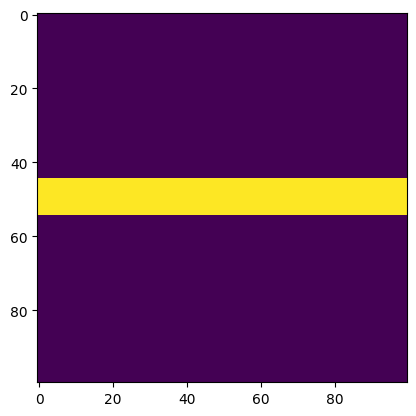

array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]])

In [14]:
recon_Weight = np.array([0.5 for _ in range(45*100)] + [1 for _ in range(10*100)] + [0.5 for _ in range(45*100)]).reshape(-1,100)
plt.imshow(recon_Weight)
plt.show()
recon_Weight

FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2_04.jpg : [7.4790053], [0.]


/var/folders/v0/dn_8jzmd0396fq71hnvs0rc80000gn/T/ipykernel_32875/1970721490.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  aImg = Image.open(aFileName).resize((100,100), Image.ANTIALIAS)


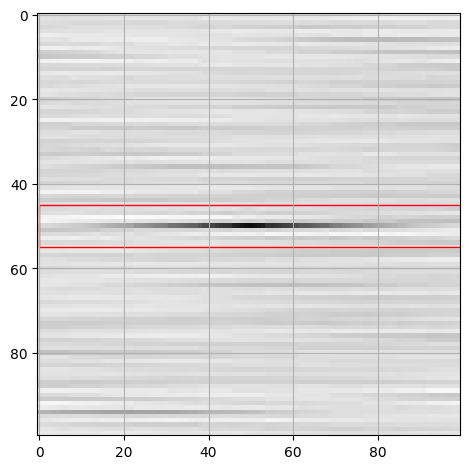

In [12]:
import matplotlib.patches as patches
from PIL import Image
aName = 'FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2_04.jpg'
moduleId = aName.split('_')[3]
aDate = aName.split('_')[4][:8]
if moduleId >= '0202' :
    aFileName = '../output/ilt_20211108_20211109/abnormal/' + aName
else : 
    aFileName = '../output/ilt_20211108_20211109/normal/' + aDate + '/' + aName

print(f"{aName} : {rawDf[rawDf.fileName == aName]['recon_error'].values}, {rawDf[rawDf.fileName == aName]['isInfected'].values}")
aImg = Image.open(aFileName).resize((100,100), Image.ANTIALIAS)
fig, ax = plt.subplots()
ax.imshow(aImg)
rect = patches.Rectangle((0, 45), 103, 10, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
# plt.axis('off')
plt.grid(visible=True)
plt.tight_layout()
plt.show()

341

FA0004_GW01_H01_0202_20211109081147_farm_mic_snd_9d37a32b4777.wav
FA0004_GW01_H01_0202_20211109081147_farm_mic_snd_9d37a32b4777_42.jpg : [23.60461], [1.]


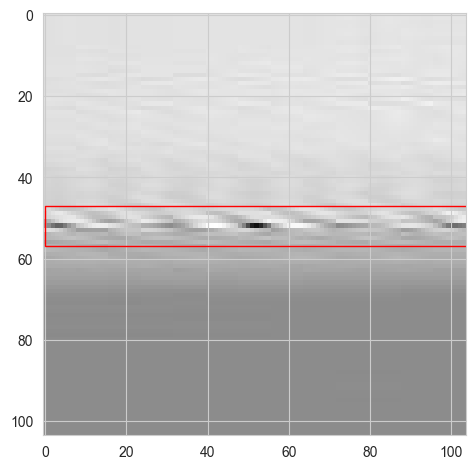

FA0004_GW01_H01_0202_20211109081147_farm_mic_snd_9d37a32b4777.wav
FA0004_GW01_H01_0202_20211109081147_farm_mic_snd_9d37a32b4777_47.jpg : [63.139038], [1.]


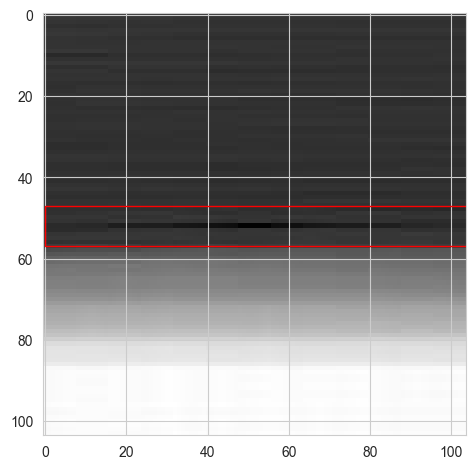

FA0004_GW01_H01_0202_20211109082646_farm_mic_snd_25060d8445c6.wav
FA0004_GW01_H01_0202_20211109082646_farm_mic_snd_25060d8445c6_08.jpg : [28.27267], [1.]


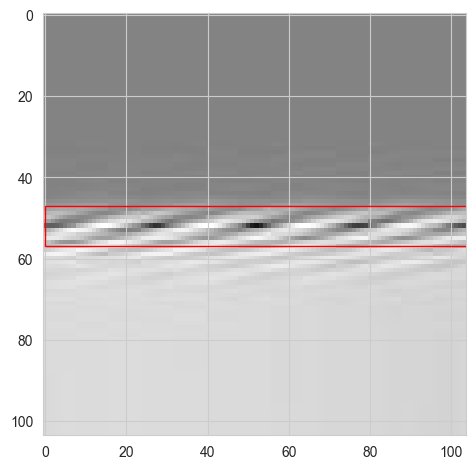

FA0004_GW01_H01_0202_20211109091147_farm_mic_snd_1569b63144e0.wav
FA0004_GW01_H01_0202_20211109091147_farm_mic_snd_1569b63144e0_04.jpg : [44.21801], [1.]


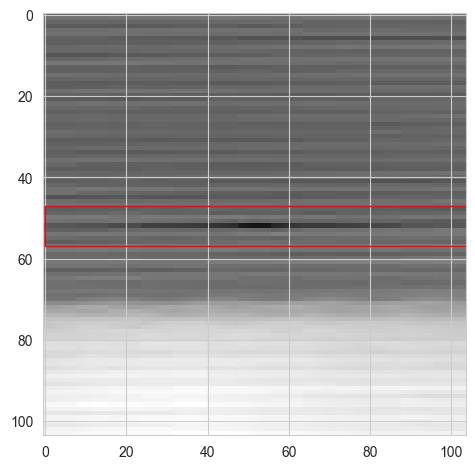

FA0004_GW01_H01_0202_20211109091147_farm_mic_snd_1569b63144e0.wav
FA0004_GW01_H01_0202_20211109091147_farm_mic_snd_1569b63144e0_06.jpg : [11.129116], [1.]


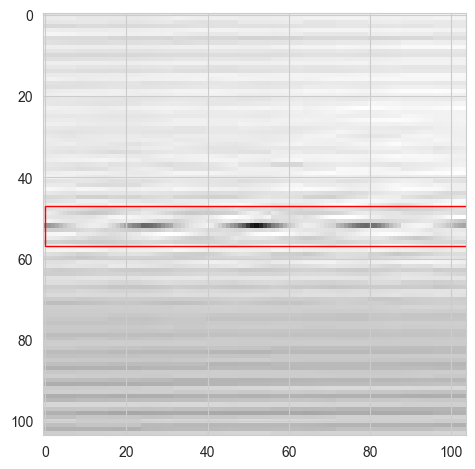

FA0004_GW01_H01_0202_20211109091147_farm_mic_snd_1569b63144e0.wav
FA0004_GW01_H01_0202_20211109091147_farm_mic_snd_1569b63144e0_17.jpg : [40.462486], [1.]


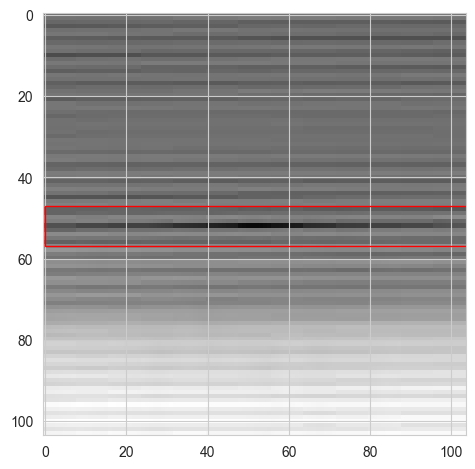

FA0004_GW01_H01_0202_20211109091147_farm_mic_snd_1569b63144e0.wav
FA0004_GW01_H01_0202_20211109091147_farm_mic_snd_1569b63144e0_20.jpg : [30.665436], [1.]


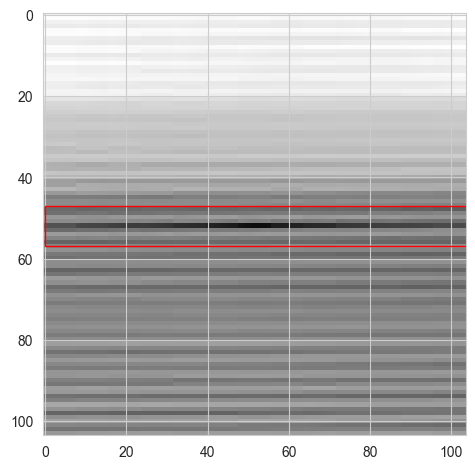

FA0004_GW01_H01_0202_20211109091147_farm_mic_snd_1569b63144e0.wav
FA0004_GW01_H01_0202_20211109091147_farm_mic_snd_1569b63144e0_21.jpg : [10.120344], [1.]


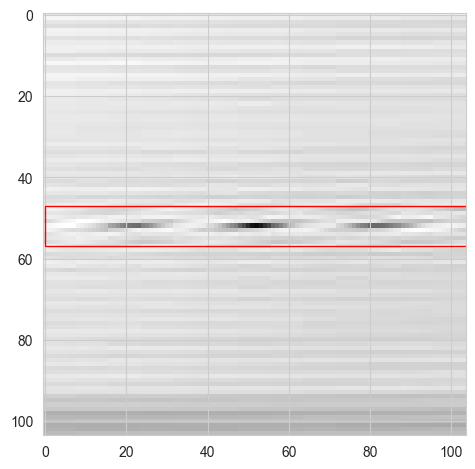

FA0004_GW01_H01_0202_20211109091147_farm_mic_snd_1569b63144e0.wav
FA0004_GW01_H01_0202_20211109091147_farm_mic_snd_1569b63144e0_22.jpg : [6.8568416], [1.]


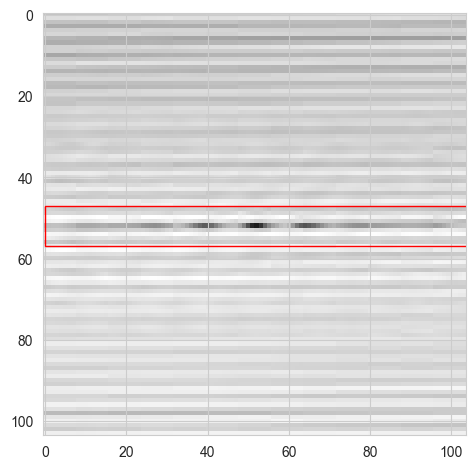

FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101.wav
FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101_17.jpg : [15.008428], [1.]


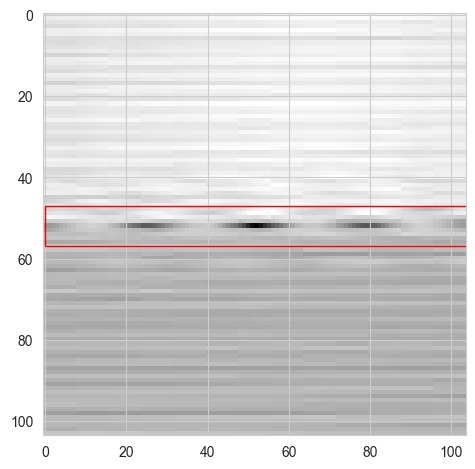

FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101.wav
FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101_18.jpg : [55.069546], [1.]


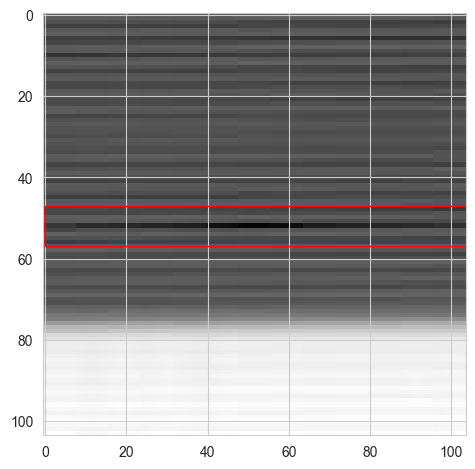

FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101.wav
FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101_40.jpg : [11.989938], [1.]


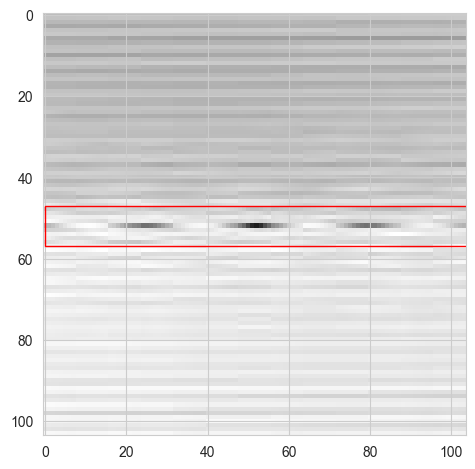

FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101.wav
FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101_41.jpg : [6.807832], [1.]


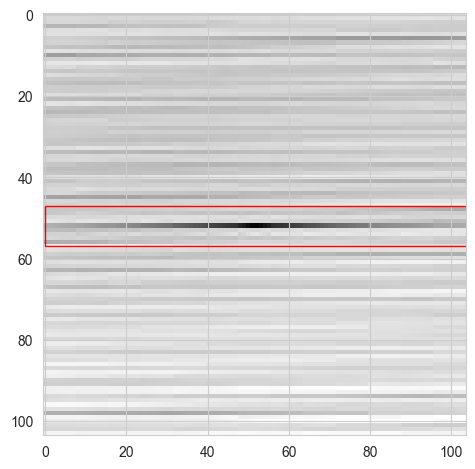

FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101.wav
FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101_51.jpg : [7.1409225], [1.]


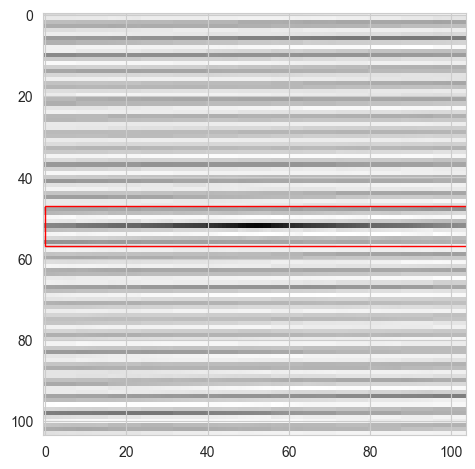

FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101.wav
FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101_52.jpg : [35.180668], [1.]


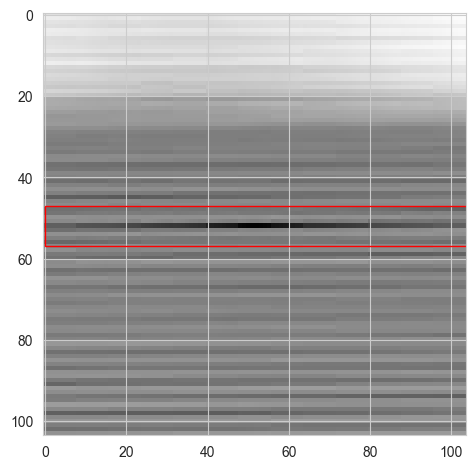

FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101.wav
FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101_54.jpg : [41.120926], [1.]


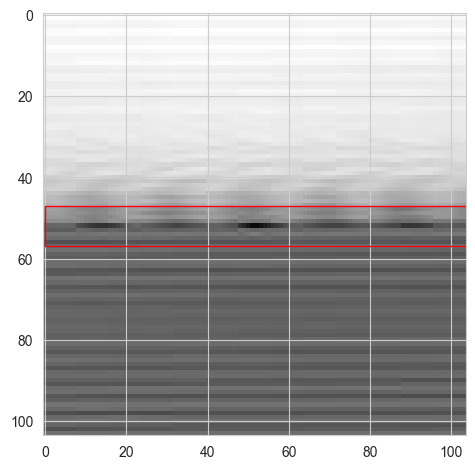

FA0004_GW01_H01_0202_20211109092647_farm_mic_snd_7a099f0d49da.wav
FA0004_GW01_H01_0202_20211109092647_farm_mic_snd_7a099f0d49da_19.jpg : [4.050195], [1.]


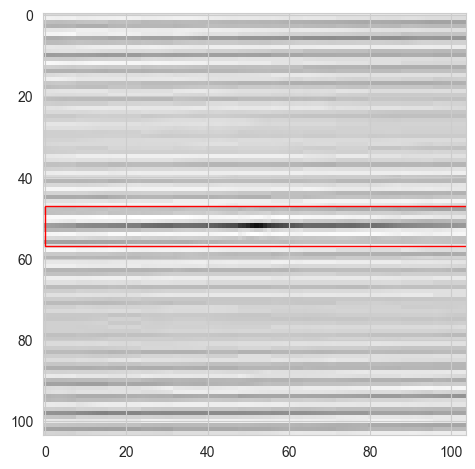

FA0004_GW01_H01_0202_20211109092647_farm_mic_snd_7a099f0d49da.wav
FA0004_GW01_H01_0202_20211109092647_farm_mic_snd_7a099f0d49da_20.jpg : [4.9080906], [1.]


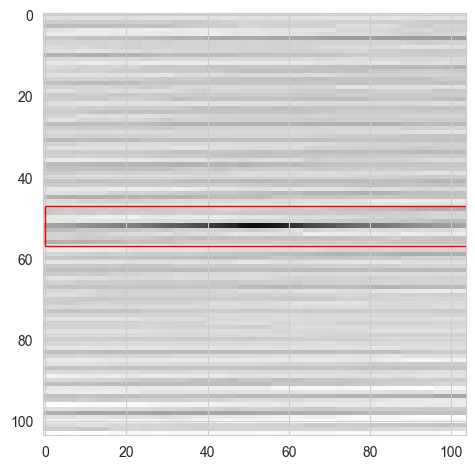

FA0004_GW01_H01_0202_20211109092647_farm_mic_snd_7a099f0d49da.wav
FA0004_GW01_H01_0202_20211109092647_farm_mic_snd_7a099f0d49da_21.jpg : [65.5044], [1.]


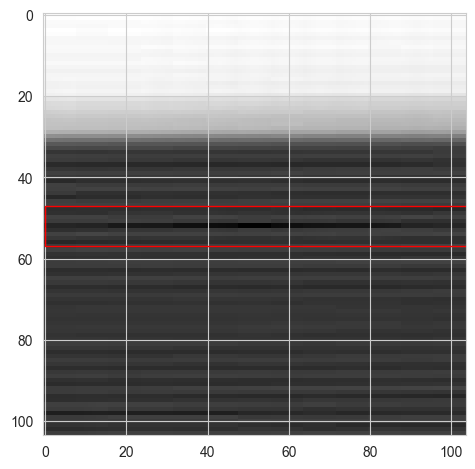

FA0004_GW01_H01_0202_20211109092647_farm_mic_snd_7a099f0d49da.wav
FA0004_GW01_H01_0202_20211109092647_farm_mic_snd_7a099f0d49da_27.jpg : [12.228693], [1.]


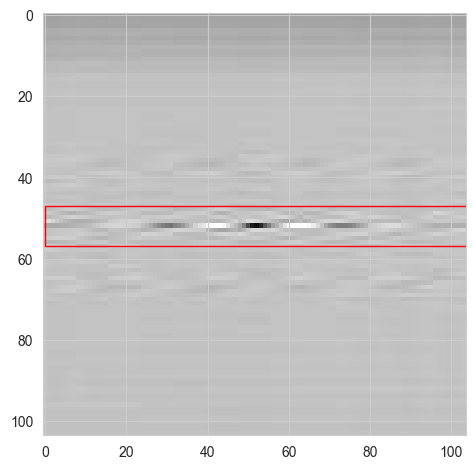

FA0004_GW01_H01_0202_20211109092647_farm_mic_snd_7a099f0d49da.wav
FA0004_GW01_H01_0202_20211109092647_farm_mic_snd_7a099f0d49da_40.jpg : [11.091713], [1.]


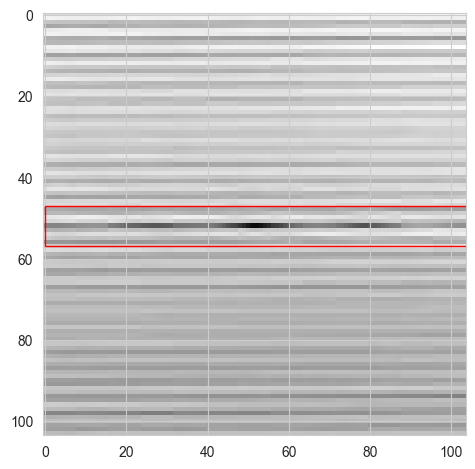

FA0004_GW01_H01_0202_20211109092647_farm_mic_snd_7a099f0d49da.wav
FA0004_GW01_H01_0202_20211109092647_farm_mic_snd_7a099f0d49da_47.jpg : [26.166906], [1.]


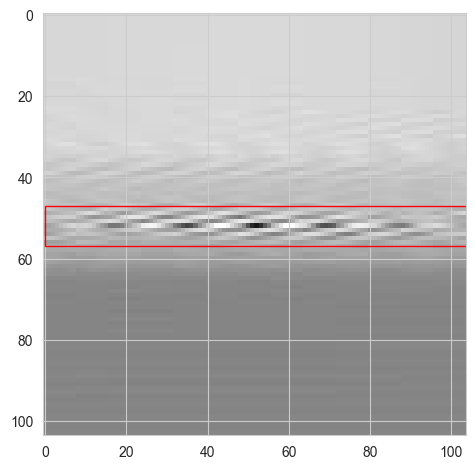

FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741.wav
FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741_22.jpg : [9.105035], [1.]


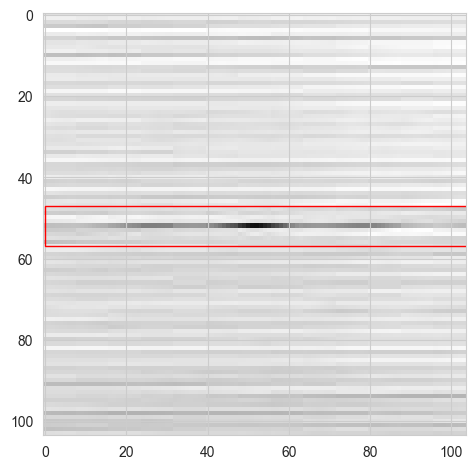

FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741.wav
FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741_23.jpg : [8.522573], [1.]


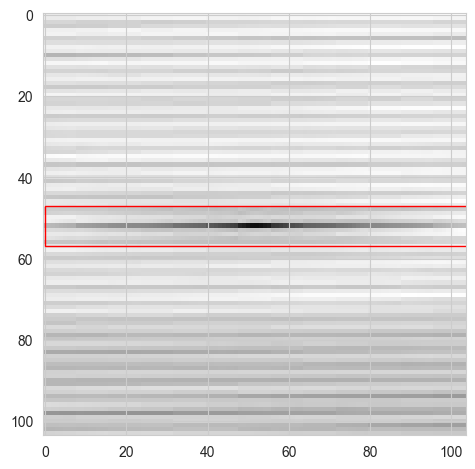

FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741.wav
FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741_31.jpg : [21.581223], [1.]


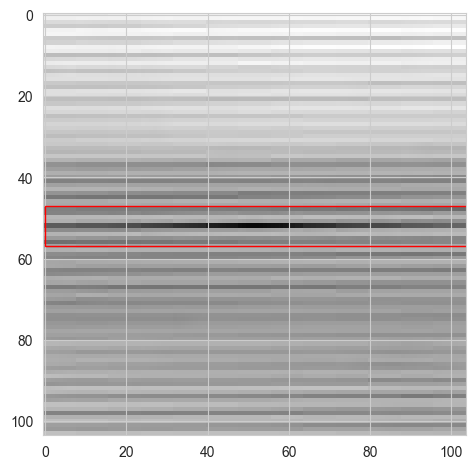

FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741.wav
FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741_40.jpg : [21.806816], [1.]


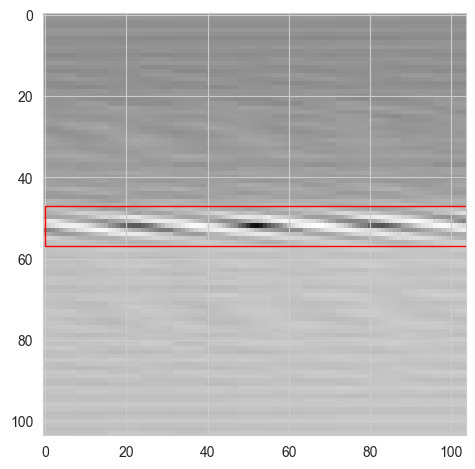

FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741.wav
FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741_44.jpg : [12.598328], [1.]


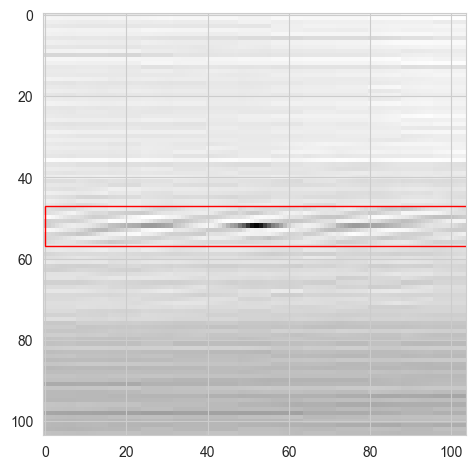

FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741.wav
FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741_48.jpg : [41.27332], [1.]


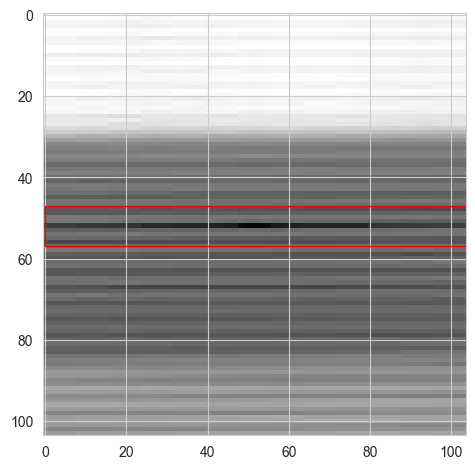

FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741.wav
FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741_53.jpg : [17.968927], [1.]


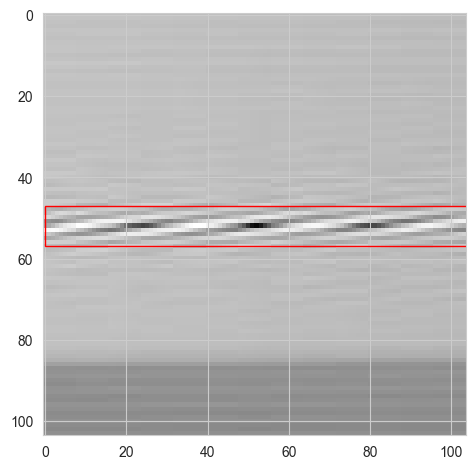

FA0004_GW01_H01_0202_20211109094648_farm_mic_snd_d9a40dc6470f.wav
FA0004_GW01_H01_0202_20211109094648_farm_mic_snd_d9a40dc6470f_45.jpg : [44.156906], [1.]


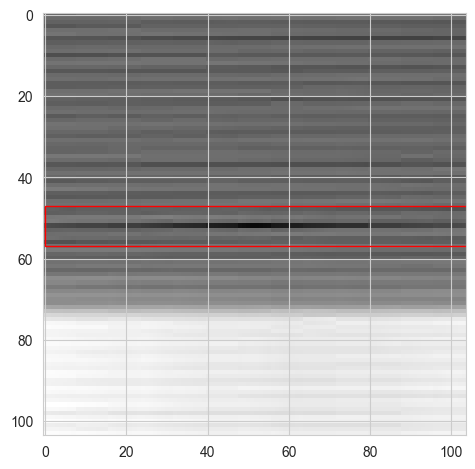

FA0004_GW01_H01_0202_20211109094648_farm_mic_snd_d9a40dc6470f.wav
FA0004_GW01_H01_0202_20211109094648_farm_mic_snd_d9a40dc6470f_47.jpg : [19.576786], [1.]


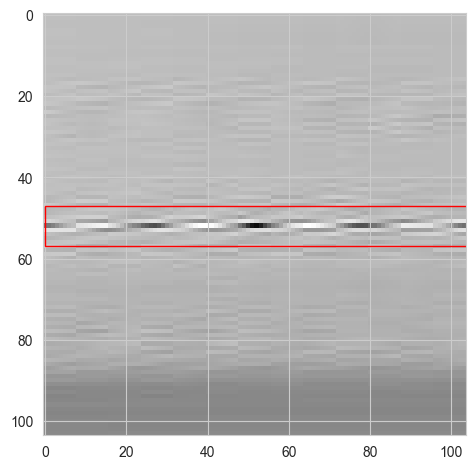

FA0004_GW01_H01_0202_20211109094648_farm_mic_snd_d9a40dc6470f.wav
FA0004_GW01_H01_0202_20211109094648_farm_mic_snd_d9a40dc6470f_58.jpg : [30.437025], [1.]


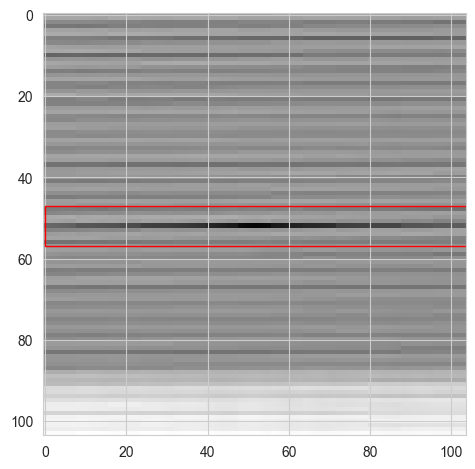

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83.wav
FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_01.jpg : [4.515233], [1.]


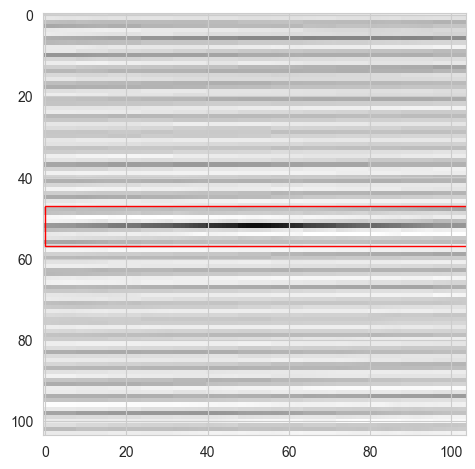

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83.wav
FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_02.jpg : [37.306015], [1.]


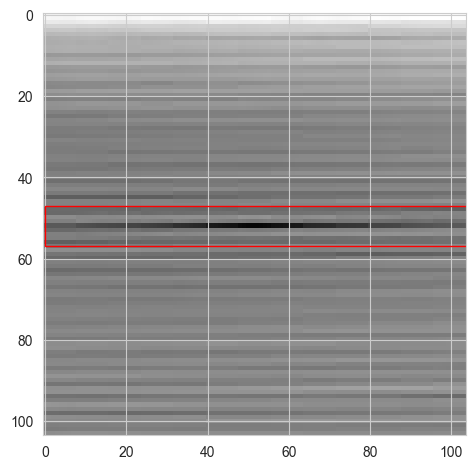

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83.wav
FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_09.jpg : [7.1855035], [1.]


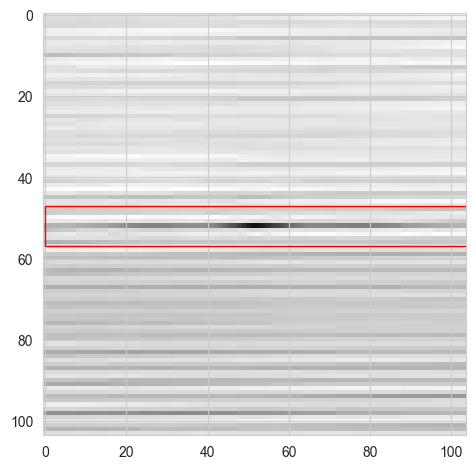

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83.wav
FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_10.jpg : [6.746889], [1.]


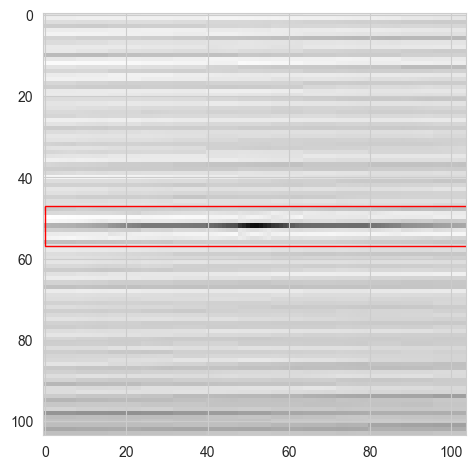

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83.wav
FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_18.jpg : [11.774], [1.]


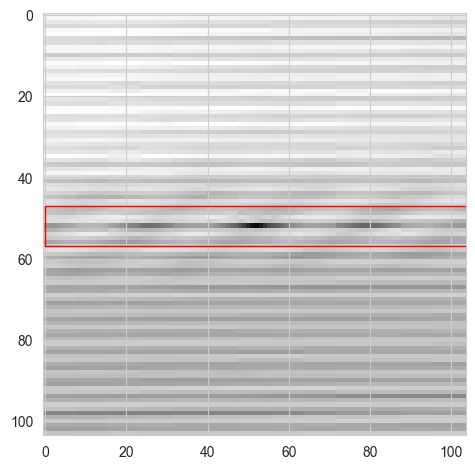

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83.wav
FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_20.jpg : [5.9384146], [1.]


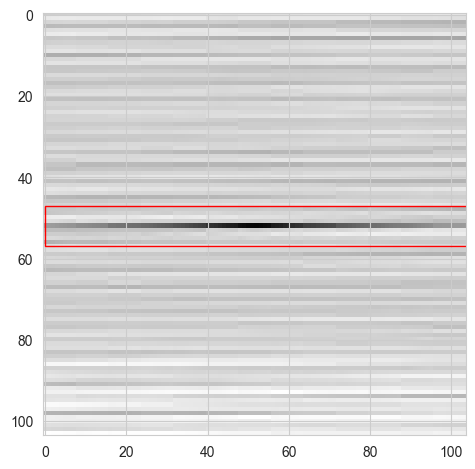

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83.wav
FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_21.jpg : [11.048794], [1.]


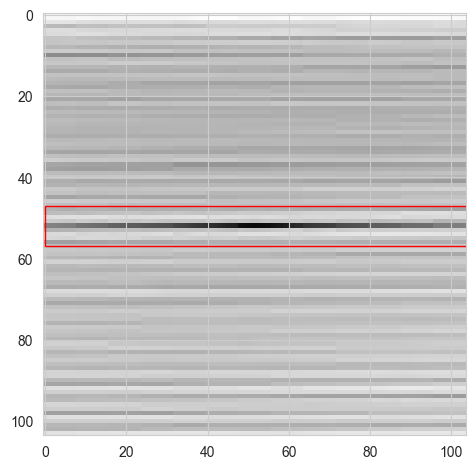

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83.wav
FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_27.jpg : [21.726809], [1.]


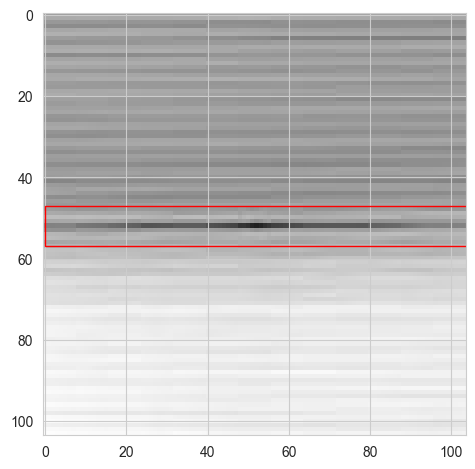

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83.wav
FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_29.jpg : [11.049781], [1.]


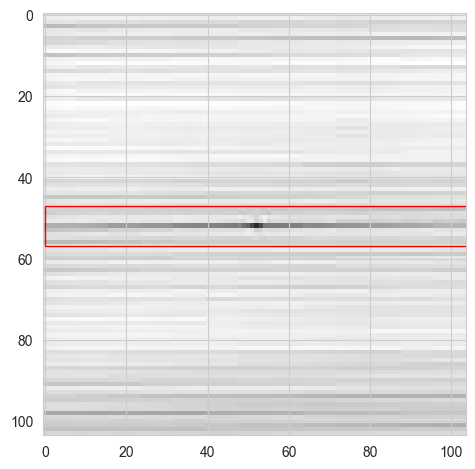

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83.wav
FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_38.jpg : [20.6934], [1.]


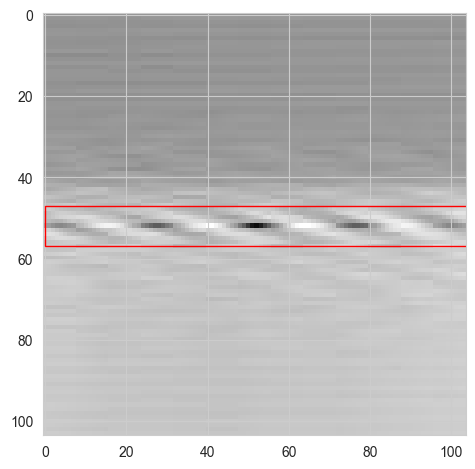

FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c.wav
FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c_10.jpg : [9.774839], [1.]


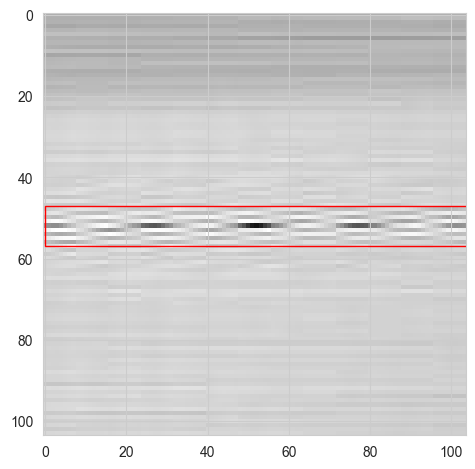

FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c.wav
FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c_12.jpg : [14.633946], [1.]


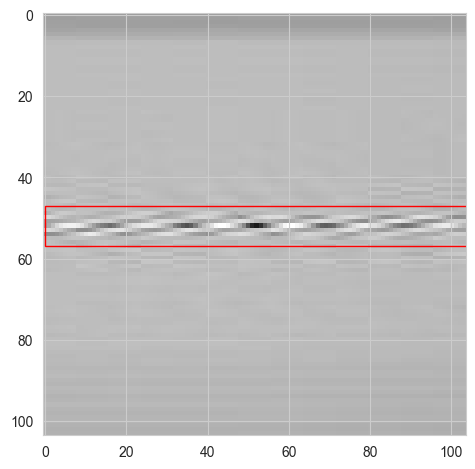

FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c.wav
FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c_23.jpg : [11.521531], [1.]


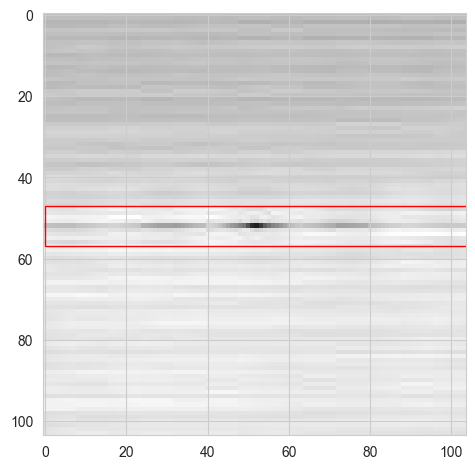

FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c.wav
FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c_24.jpg : [13.115545], [1.]


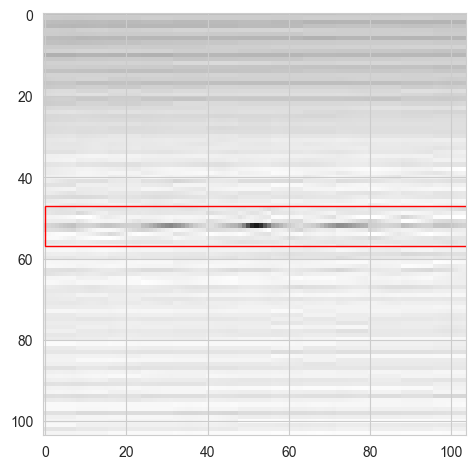

FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c.wav
FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c_25.jpg : [8.4629965], [1.]


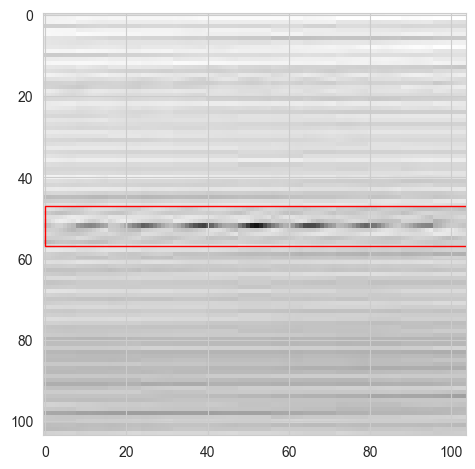

FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c.wav
FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c_26.jpg : [10.105614], [1.]


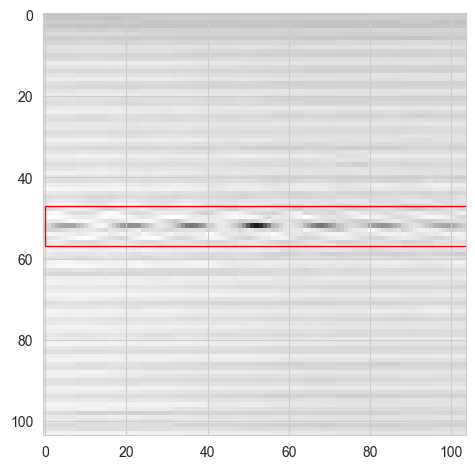

FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c.wav
FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c_40.jpg : [11.638193], [1.]


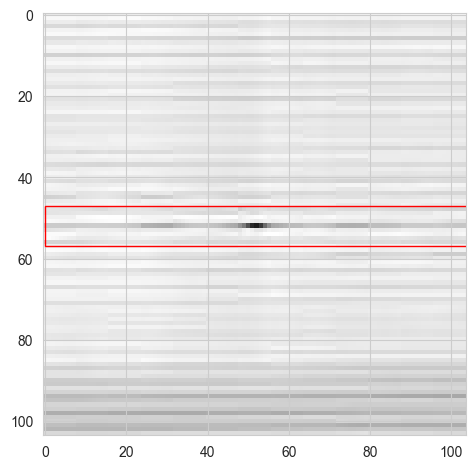

FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c.wav
FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c_51.jpg : [8.031145], [1.]


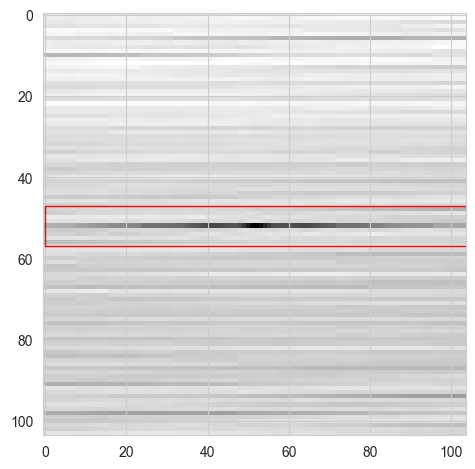

FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c.wav
FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c_52.jpg : [48.51183], [1.]


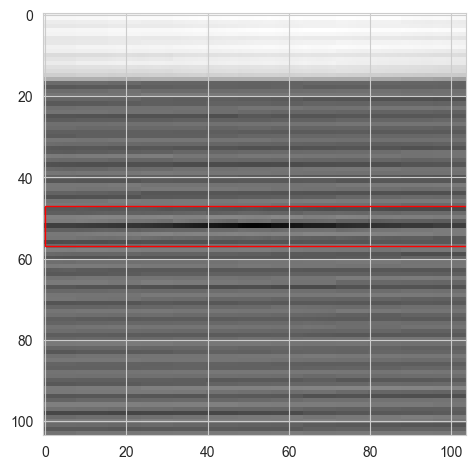

In [208]:
# tsne outlier and class normal
import matplotlib.patches as patches
# filelistTsne = rawDf[(rawDf.tsneClass == 1) & ((rawDf.moduleId.str.contains('0200|0201')))]['fileName'].to_list()
filelistTsne = rawDf[(rawDf.isInfected == 1.)]['fileName'].to_list()
len(filelistTsne)
start = 150 
end = min(start+50,len(filelistTsne))
for idx, aName in enumerate(filelistTsne) : 
    if idx < start : continue
    if idx > end : break
    moduleId = aName.split('_')[3]
    aDate = aName.split('_')[4][:8]
    if moduleId >= '0202' :
        aFileName = '../output/ilt_20211108_20211109/abnormal/' + aName
    else : 
        aFileName = '../output/ilt_20211108_20211109/normal/' + aDate + '/' + aName
    print(f"{'_'.join(aName.split('_')[:-1])+'.wav'}")
    print(f"{aName} : {rawDf[rawDf.fileName == aName]['recon_error'].values}, {rawDf[rawDf.fileName == aName]['isInfected'].values}")
    aImg = plt.imread(aFileName)
    fig, ax = plt.subplots()
    ax.imshow(aImg)
    rect = patches.Rectangle((0, 47), 104, 10, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    # plt.axis('off')
    plt.grid(visible=True)
    plt.tight_layout()
    plt.show()

#### no scaler

<Figure size 1600x1000 with 0 Axes>

Text(0.5, 1.0, 'normal')

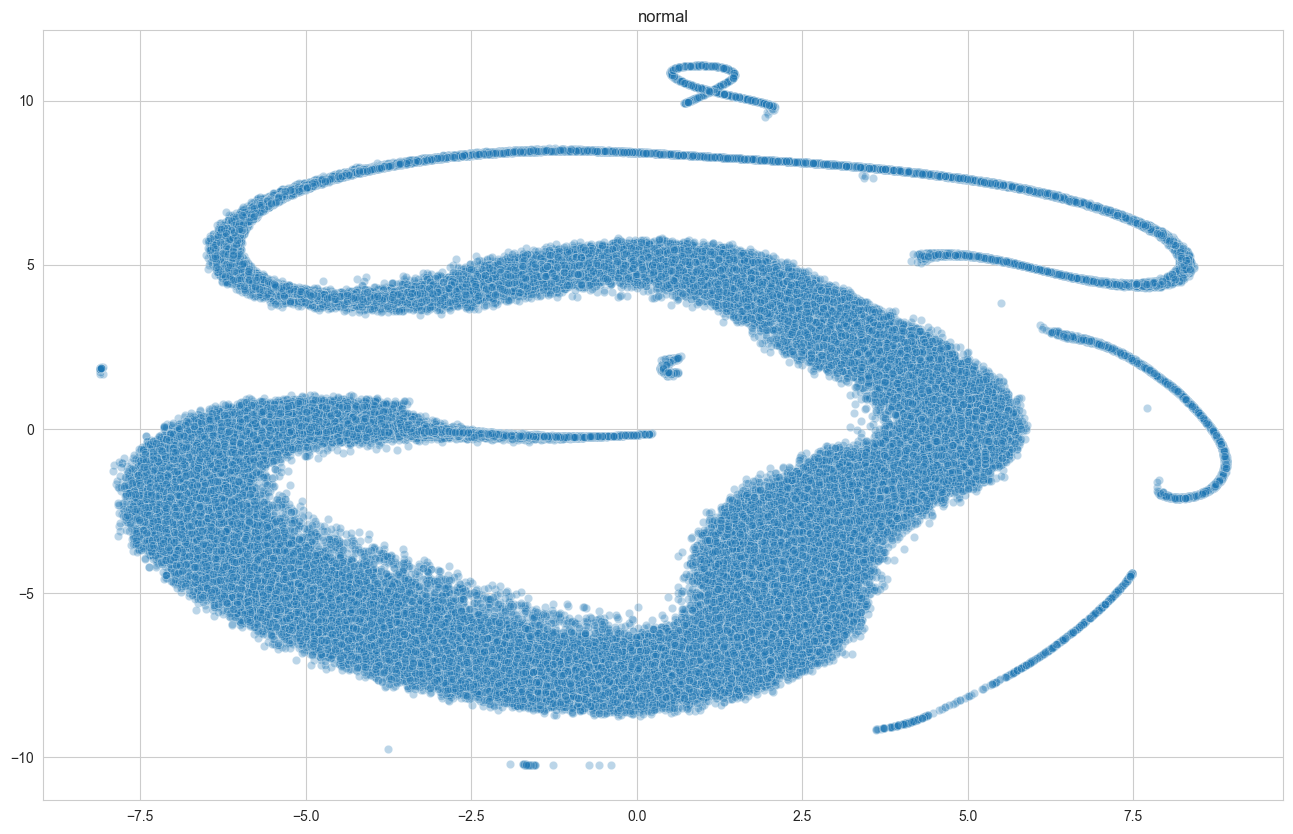

<Figure size 1600x1000 with 0 Axes>

Text(0.5, 1.0, 'abnormal')

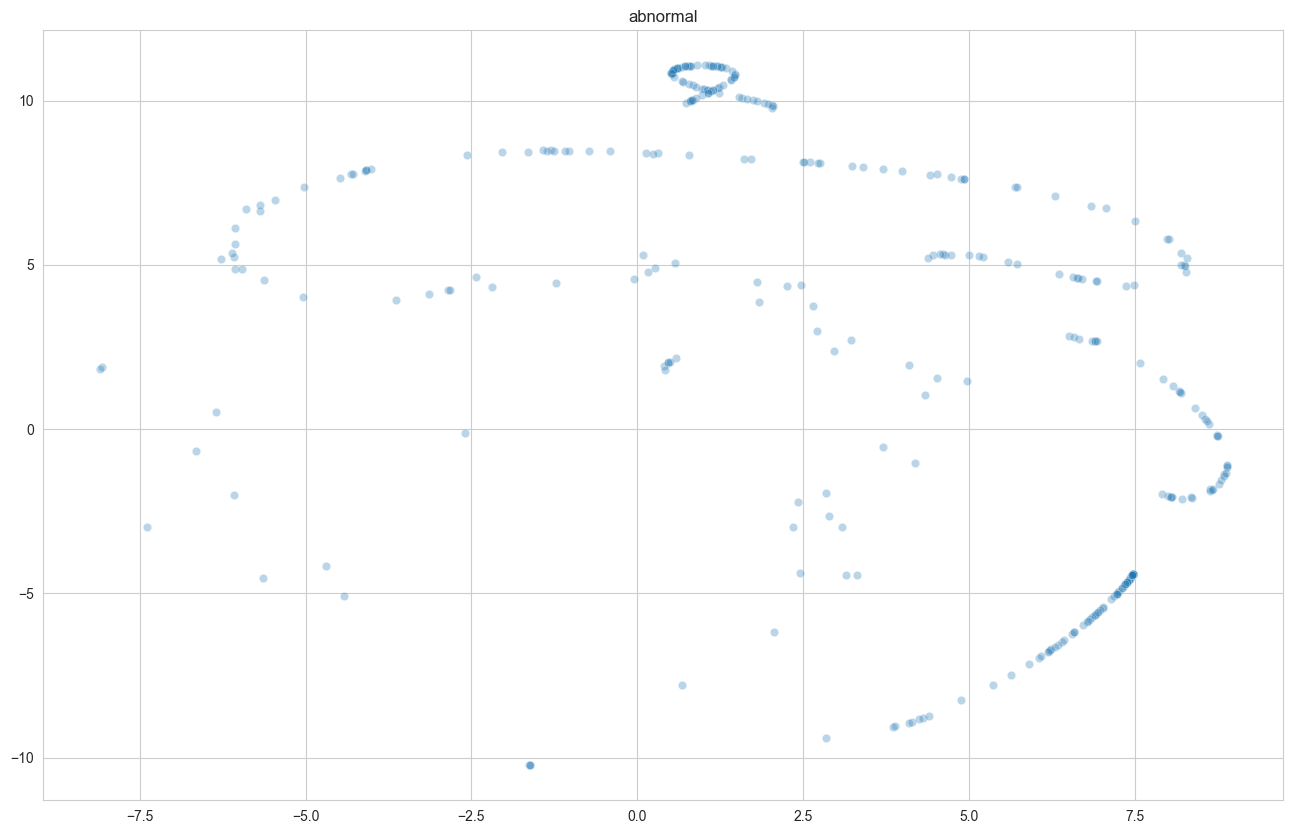

<Figure size 1600x1000 with 0 Axes>

Text(0.5, 1.0, 'all')

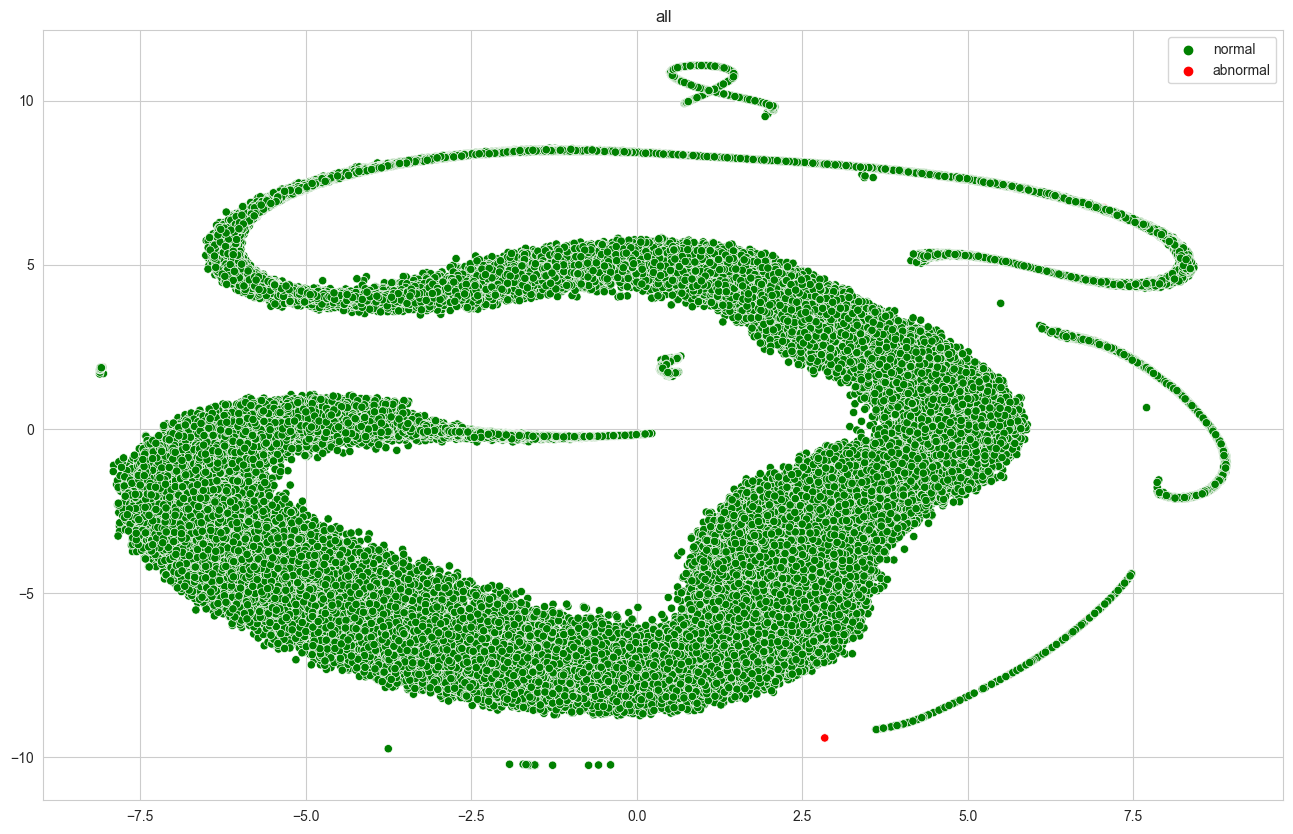

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
# circle1 = plt.Circle(xy=(0, 0), radius=53, color='red', fill=False)
ax = sns.scatterplot(
    x=digits_tsne_test[normal_index,0], y=digits_tsne_test[normal_index,1],
    # palette=sns.color_palette("hls", 2),hue=colors_pred_test, 
    legend="full",
    alpha=0.3
)

# ax.add_patch(circle1)
# ax.set(xlim=(-20, 30))
# ax.set(ylim=(-100, 100));
plt.title("normal")
plt.show() 

plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
# circle1 = plt.Circle(xy=(0, 0), radius=53, color='red', fill=False)
ax = sns.scatterplot(
    x=digits_tsne_test[abnormal_index,0], y=digits_tsne_test[abnormal_index,1],
    # palette=sns.color_palette("hls", 2),hue=colors_pred_test, 
    legend="full",
    alpha=0.3
)

# ax.add_patch(circle1)
# ax.set(xlim=(-20, 30))
# ax.set(ylim=(-100, 100));
plt.title("abnormal")
plt.show() 

plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
ax = sns.scatterplot(
    x=digits_tsne_test[:,0], y=digits_tsne_test[:,1],
    palette=['green','red'],hue=colors_pred_test, 
    legend="full",
    alpha=0.3
)

# ax.add_patch(circle1)
# ax.set(xlim=(-20, 30))
# ax.set(ylim=(-100, 100));
plt.title("all")
plt.show() 


